# Exploratory Data Analysis - Carbon Credits

## Project Description

### What are Carbon Credits?

First of all, I'll start by explaining what Carbon Credits are.

Carbon credits are tradable certificates representing one ton of carbon dioxide (CO2). They are crucial in mitigating climate change by incentivizing emission reductions and supporting sustainable practices. Organizations earn carbon credits by reducing emissions or sequestering CO2 from the atmosphere below a predetermined baseline, which can then be sold or traded to other entities to offset their emissions. This system helps encourage investment in cleaner technologies and practices while providing a financial incentive for emission reductions.

In this project, I'll focus on carbon credits from a specific registry, Verra, the largest one in the voluntary carbon market environment. In this dynamic, the organizations responsible for those reductions or sequestration are independent and might or might not be funded by polluting companies.

Their goal is to generate income through the selling of carbon credits.

### Project Objective

This project focuses on the analysis of carbon credit retirements and availability using data sourced from the Verra registry. Through exploratory data analysis (EDA) This project focuses on analyzing carbon credit retirements and availability using data sourced from the Verra registry. Using exploratory data analysis (EDA) techniques, various criteria, such as vintage, project type, country, and retirement date, are examined to gain insights into carbon credit markets.

In the dynamic landscape of carbon credit markets, navigating unfamiliar concepts can take time for companies seeking to offset their emissions. This project aims to demystify the market by providing comprehensive insights into aspects such as vintage, project types, additional certifications, and more. By offering valuable information and analysis, this project serves as a tool for companies better to understand the dynamics of the carbon credit market. Additionally, trading companies can leverage these insights to gain a competitive edge and make informed decisions in their trading activities.

**Key Questions Explored**:

- What characteristics determine the quality of a carbon credit?
- Is there a pattern among companies offsetting through carbon credits?
- What is the current state of the carbon credit market?

By addressing these questions, this project aims to provide valuable insights that can inform decision-making processes and strives to contribute significantly to a deeper understanding of carbon credit markets.

All data used for this project was extracted from Verra's public registry: https://registry.verra.org/app/search/VCS



## Importing libraries

In [161]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.ticker import PercentFormatter
import requests
import geopandas as gpd
import re
import plotly.io as pio
import os

## Data Extraction

When retrieving data from Verra's registry, the files are typically in XLSX format. 

To streamline the process, we convert these files to CSV format. This conversion is beneficial as CSV files are quicker to read compared to Excel files, making it easier to work with the data

In [162]:
# First time as xlsx

# retirements_df = pd.read_excel(r"C:\Users\Victor\Documents\Programming\Portfolio\Power BI\DB\vcus_retired.xlsx")

# retirements_df.to_csv("retirements_data.csv", index=False)


In [163]:
retirements_df = pd.read_csv(r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\original data\retirements_data.csv")

In [164]:
retirements_df.head()

Issuance Date                      Sustainable Development Goals  \
0    2024-03-25  06: Clean Water and Sanitation; 13: Climate Ac...   
1    2024-03-19                                                NaN   
2    2024-03-12                                                NaN   
3    2024-03-12                                                NaN   
4    2024-03-12                                                NaN   

  Vintage Start Vintage End    ID  \
0    2020-01-01  2020-12-31   607   
1    2018-01-01  2018-12-31   868   
2    2019-01-01  2019-12-31   960   
3    2017-01-01  2017-12-31  2317   
4    2016-02-23  2016-12-31  2317   

                                                Name Country/Area  \
0                    Darkwoods Forest Carbon Project       Canada   
1  REDD project in Brazil nut concessions in Madr...         Peru   
2  Lumin/Eucapine Uruguay Forest Plantations on d...      Uruguay   
3                 REDD+ Project Magnolios de Yarumal     Colombia   
4                 REDD+ Project Magnolios de Yarumal     Colombia   

                              Project Type Methodology  \
0  Agriculture Forestry and Other Land Use      VM0012   
1  Agriculture Forestry and Other Land Use      VM0007   
2  Agriculture Forestry and Other Land Use  AR-ACM0001   
3  Agriculture Forestry and Other Land Use      VM0015   
4  Agriculture Forestry and Other Land Use      VM0015   

   Total Vintage Quantity  Quantity Issued  \
0                  277899             2000   
1                 2317178             1100   
2                  624642             1200   
3                    2759              341   
4                    2468             1926   

                                       Serial Number  \
0  16522-767002131-767004130-VCS-VCU-261-VER-CA-1...   
1  16506-764164779-764165878-VCS-VCU-263-VER-PE-1...   
2  16464-763313284-763314483-VCS-VCU-263-VER-UY-1...   
3  16468-763334131-763334471-VCS-VCU-1323-VER-CO-...   
4  16469-763334472-763336397-VCS-VCU-1323-VER-CO-...   

                           Additional Certifications  \
0  06: Clean Water and Sanitation; 13: Climate Ac...   
1                                                NaN   
2                                 CCB-No Distinction   
3                                                NaN   
4                                                NaN   

  Retirement/Cancellation Date  \
0                   2024-04-03   
1                   2024-03-20   
2                   2024-03-14   
3                   2024-03-19   
4                   2024-03-19   

                              Retirement Beneficiary  \
0                                                NaN   
1  Compensación del e-commerce de Cencosud Retail...   
2                                                NaN   
3                                 Betsson Group 2024   
4                                 Betsson Group 2024   

                       Retirement Reason  Retirement Details  
0                                    NaN                 NaN  
1  Retirement for Person or Organization                 NaN  
2                                    NaN                 NaN  
3                  Environmental Benefit  Betsson Group 2024  
4                  Environmental Benefit  Betsson Group 2024

In [165]:
# First time as xlsx

# available_df = pd.read_excel(r"C:\Users\Victor\Documents\Programming\Portfolio\Power BI\DB\vcus_active.xlsx")

# available_df.to_csv("available_data.csv", index=False)


In [166]:
available_df = pd.read_csv(r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\original data\available_data.csv")

In [167]:
available_df.head()

Issuance Date Sustainable Development Goals Vintage Start Vintage End   ID  \
0    2024-04-03                           NaN    2017-01-01  2017-12-31  868   
1    2024-04-03                           NaN    2018-01-01  2018-12-31  883   
2    2024-04-03                           NaN    2020-01-01  2020-12-31  928   
3    2024-04-03                           NaN    2021-01-01  2021-07-31  928   
4    2024-04-03                           NaN    2012-10-02  2012-12-31  500   

                                                Name Country/Area  \
0  REDD project in Brazil nut concessions in Madr...         Peru   
1  Madushan Hydropower Project on Honghe River in...        China   
2                   Yunnan Mangli Hydropower Project        China   
3                   Yunnan Mangli Hydropower Project        China   
4  Positive Climate Care 3.55 MW bundled Grid con...        India   

                                        Project Type Methodology  \
0            Agriculture Forestry and Other Land Use      VM0007   
1  Energy industries (renewable/non-renewable sou...     ACM0002   
2  Energy industries (renewable/non-renewable sou...     ACM0002   
3  Energy industries (renewable/non-renewable sou...     ACM0002   
4  Energy industries (renewable/non-renewable sou...    AMS-I.D.   

   Total Vintage Quantity  Quantity Issued  \
0                 2366747              252   
1                 1120868            67000   
2                   39181            39181   
3                   13422            13422   
4                     387              387   

                                       Serial Number  \
0  16564-773386523-773386774-VCS-VCU-263-VER-PE-1...   
1  16556-773253916-773320915-VCS-VCU-262-VER-CN-1...   
2  16557-773320916-773360096-VCS-VCU-259-VER-CN-1...   
3  16558-773360097-773373518-VCS-VCU-259-VER-CN-1...   
4  16559-773373519-773373905-VCS-VCU-337-VER-IN-1...   

  Additional Certifications Retirement/Cancellation Date  \
0                       NaN                          NaN   
1                       NaN                          NaN   
2                       NaN                          NaN   
3                       NaN                          NaN   
4                       NaN                          NaN   

   Retirement Beneficiary  Retirement Reason  Retirement Details  
0                     NaN                NaN                 NaN  
1                     NaN                NaN                 NaN  
2                     NaN                NaN                 NaN  
3                     NaN                NaN                 NaN  
4                     NaN                NaN                 NaN

## Data Treatment

### Check for Duplicates

While it's not uncommon to encounter retirements with identical information (such as the same company, quantity, projects, and date), it's crucial to note that the Serial Number should be unique for each retirement process.

This unique identifier ensures accurate tracking and management of carbon credit retirements, helping to maintain data integrity and avoid potential discrepancies in the records.

In [168]:
num_duplicates = retirements_df.duplicated(subset='Serial Number').sum()

print(f'There are {num_duplicates} duplicate columns')

There are 0 duplicate columns


### Columns Treatment

When switching from xlsx to csv we end up changing the data format.

Here I'm going to adjust column types, rewrite column names for better clarity and also remove unnecessary columns.

#### Retirements

In [169]:
retirements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213106 entries, 0 to 213105
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Issuance Date                  213106 non-null  object
 1   Sustainable Development Goals  22999 non-null   object
 2   Vintage Start                  213106 non-null  object
 3   Vintage End                    213106 non-null  object
 4   ID                             213106 non-null  int64 
 5   Name                           213106 non-null  object
 6   Country/Area                   213106 non-null  object
 7   Project Type                   213106 non-null  object
 8   Methodology                    211103 non-null  object
 9   Total Vintage Quantity         213106 non-null  int64 
 10  Quantity Issued                213106 non-null  int64 
 11  Serial Number                  213106 non-null  object
 12  Additional Certifications      77785 non-nul

**Data dictionary**

**1. Issuance Date**: Date that specific credit became available for retirement; <br>
**2. Sustainable Development Goals**: Display the SDGs linked to that project; <br>
**3. Vintage Start**: When the removal or reductions started. The market usually takes into consideration the last year (Vintage End). Because of this, I'll remove this column; <br>
**4. Vintage End**: Effectively used to determine the 'Vintage'. It determines the year the CO2 removal or reduction occurred; <br>
**5. ID**: Project's ID on Verra's registry; <br>
**6. Name**: Project name on Verra's registry; <br>
**7. Country/Area**: Country where the project was developed; <br>
**8. Project Type**: Describes the process by which the reduction or removal occurred. Most commons are projects related to reforestation or renewable energy production; <br>
**9. Methodology**: A more specific way to describe how the reduction happened. It encompasses more technical aspects of the project; <br>
**10. Total Vintage Quantity**: Total credits issued for that Vintage. Since the available quantity achieves a similar goal but is more adequate for real-time analysis, I'll remove this column; <br>
**11. Quantity Issued**: Quantity retired in that specific record. I'll change this name for better clarity; <br>
**12. Serial Number**: Used for checking duplicates, as mentioned above. I won't use this column anymore. It'll be dropped; <br>
**13. Additional Certifications**: Shows additional certifications linked to that project. Usually will be used to certificate co-benefits linked to the project; <br>
**14. Retirement/Cancellation Date**: Date the retirement occurred; <br>
**15. Retirement Beneficiary**: Company, person, or some other entity that retired or was the final beneficiary of the retirement; <br>
**16. Retirement Reason**: Has no real pattern or usage. This column will be dropped; <br>
**17. Retirement Details**: Companies or credit holders use this field to describe some specificities of the retirement. It's not useful for this analysis. I'll drop this column.



In [170]:
retirements_columns = retirements_df.columns.tolist()

retirements_columns

['Issuance Date',
 'Sustainable Development Goals',
 'Vintage Start',
 'Vintage End',
 'ID',
 'Name',
 'Country/Area',
 'Project Type',
 'Methodology',
 'Total Vintage Quantity',
 'Quantity Issued',
 'Serial Number',
 'Additional Certifications',
 'Retirement/Cancellation Date',
 'Retirement Beneficiary',
 'Retirement Reason',
 'Retirement Details']

In [171]:
# Converting Data columns to the correct type

retirements_df[["Issuance Date", "Vintage End", "Retirement/Cancellation Date"]] = retirements_df[["Issuance Date", "Vintage End", "Retirement/Cancellation Date"]].apply(lambda x: pd.to_datetime(x))

In [172]:
# Dropping unnecessary columns

dropped_columns_ret = [
    "Vintage Start",
    "Total Vintage Quantity",
    "Serial Number",
    "Retirement Reason",
    "Retirement Details"
]

retirements_df.drop(columns=dropped_columns_ret, inplace=True)

In [173]:
# Renaming some columns for better clarity

columns_rename_ret = {
    "Sustainable Development Goals": "SDGs",
    "Vintage End": "Vintage",
    "Country/Area": "Country",
    "Quantity Issued": "Quantity Retired",
    "Retirement Beneficiary": "Company",
    "Retirement/Cancellation Date": "Retirement Date"
}

retirements_df.rename(columns=columns_rename_ret, inplace=True)

In [174]:
# Checking for nulls and data format

retirements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213106 entries, 0 to 213105
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Issuance Date              213106 non-null  datetime64[ns]
 1   SDGs                       22999 non-null   object        
 2   Vintage                    213106 non-null  datetime64[ns]
 3   ID                         213106 non-null  int64         
 4   Name                       213106 non-null  object        
 5   Country                    213106 non-null  object        
 6   Project Type               213106 non-null  object        
 7   Methodology                211103 non-null  object        
 8   Quantity Retired           213106 non-null  int64         
 9   Additional Certifications  77785 non-null   object        
 10  Retirement Date            213106 non-null  datetime64[ns]
 11  Company                    97600 non-null   object  

Out of all columns with null values, Methodology is the only one that shouldn't have. Let's investigate further.

In [175]:
ret_methodology_null = retirements_df[retirements_df["Methodology"].isnull()]
ret_methodology_null["Project Type"].value_counts()

Fugitive emissions from fuels (solid, oil and gas)    1577
Mining/mineral production                              426
Name: Project Type, dtype: int64

In [176]:
retirements_df[retirements_df["Project Type"] == "Fugitive emissions from fuels (solid, oil and gas)"]["Methodology"].value_counts()

AM0023        287
ACM0001       167
ACM0008       131
AM0009         96
VM0014         76
AMS-III.D.      3
Name: Methodology, dtype: int64

In [177]:
null_pct_retirements = ret_methodology_null["Quantity Retired"].sum()/retirements_df["Quantity Retired"].sum()

print(f"Retirements with null Methodology represents {null_pct_retirements:.2%} of total retirements.")

Retirements with null Methodology represents 0.37% of total retirements.


Methodology might be similar for projects within the same type, so I tried to check if there is any clear correlation between them, so I could fill null values with the most common Methodology among projects with same Project Type. 
Since we have multiple methodologies within the same Project Type, it wouldn't make much sense to fill null values with them. They represent only 0.37% of all retirements and it won't impact the analysis overall.

#### Available

Similar treatment to the available dataframe as the retirements.

In [178]:
available_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20467 entries, 0 to 20466
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Issuance Date                  20467 non-null  object 
 1   Sustainable Development Goals  1639 non-null   object 
 2   Vintage Start                  20467 non-null  object 
 3   Vintage End                    20467 non-null  object 
 4   ID                             20467 non-null  int64  
 5   Name                           20467 non-null  object 
 6   Country/Area                   20467 non-null  object 
 7   Project Type                   20467 non-null  object 
 8   Methodology                    20452 non-null  object 
 9   Total Vintage Quantity         20467 non-null  int64  
 10  Quantity Issued                20467 non-null  int64  
 11  Serial Number                  20467 non-null  object 
 12  Additional Certifications      7335 non-null  

All column names are, and should be, the same, with the exception of 'Quantity Issued' that in the available_df means 'Quantity Available'

In [179]:
available_df[["Issuance Date", "Vintage End"]] = available_df[["Issuance Date", "Vintage End"]].apply(lambda x: pd.to_datetime(x))

In [180]:
available_columns = available_df.columns.tolist()

available_columns

['Issuance Date',
 'Sustainable Development Goals',
 'Vintage Start',
 'Vintage End',
 'ID',
 'Name',
 'Country/Area',
 'Project Type',
 'Methodology',
 'Total Vintage Quantity',
 'Quantity Issued',
 'Serial Number',
 'Additional Certifications',
 'Retirement/Cancellation Date',
 'Retirement Beneficiary',
 'Retirement Reason',
 'Retirement Details']

In [181]:
# Dropping unnecessary columns. Retirement Date and Beneficiary will be removed here, because these are available credits, with no retirement.

dropped_columns_av = [
    "Vintage Start",
    "Serial Number",
    "Retirement/Cancellation Date",
    "Retirement Beneficiary",
    "Retirement Reason",
    "Retirement Details"
]

available_df.drop(columns=dropped_columns_av, inplace=True)

In [182]:
columns_rename_av = {
    "Sustainable Development Goals": "SDGs",
    "Vintage End": "Vintage",
    "Country/Area": "Country",
    "Quantity Issued": "Quantity Available"
}

available_df.rename(columns=columns_rename_av, inplace=True)

In [183]:
available_df.info()

# Similar situation with the null values in the Methodology column. Since we analyzed it previously, let"s proceed with the data treatment.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20467 entries, 0 to 20466
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Issuance Date              20467 non-null  datetime64[ns]
 1   SDGs                       1639 non-null   object        
 2   Vintage                    20467 non-null  datetime64[ns]
 3   ID                         20467 non-null  int64         
 4   Name                       20467 non-null  object        
 5   Country                    20467 non-null  object        
 6   Project Type               20467 non-null  object        
 7   Methodology                20452 non-null  object        
 8   Total Vintage Quantity     20467 non-null  int64         
 9   Quantity Available         20467 non-null  int64         
 10  Additional Certifications  7335 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 1.7+ MB


#### Vintage Treatment

In [184]:
# Switching the Vintage format to year. The market describes the Vintage as the year, not using days or months.

available_df["Vintage"] = available_df["Vintage"].dt.year

retirements_df["Vintage"] = retirements_df["Vintage"].dt.year

#### Adjusting Countries / Regions

Later on, I`ll investigate retirements and availability per region, using a heatmap. 

For that, I obtained the list of countries plotly uses: https://stackoverflow.com/questions/62566605/plotly-list-of-valid-country-names-from-iso-3-code

And also a list of Countries per Continent: https://www.kaggle.com/datasets/hserdaraltan/countries-by-continent 


In [185]:
countries_by_continent = pd.read_csv(r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\support files\Countries by continents.csv")

lib_countries = {"BD":"Bangladesh","BE":"Belgium","BF":"Burkina Faso","BG":"Bulgaria","BA":"Bosnia and Herzegovina","BB":"Barbados","WF":"Wallis and Futuna","BL":"Saint Barthelemy","BM":"Bermuda","BN":"Brunei","BO":"Bolivia","BH":"Bahrain","BI":"Burundi","BJ":"Benin","BT":"Bhutan","JM":"Jamaica","BV":"Bouvet Island","BW":"Botswana","WS":"Samoa","BQ":"Bonaire, Saint Eustatius and Saba ","BR":"Brazil","BS":"Bahamas","JE":"Jersey","BY":"Belarus","BZ":"Belize","RU":"Russia","RW":"Rwanda","RS":"Serbia","TL":"East Timor","RE":"Reunion","TM":"Turkmenistan","TJ":"Tajikistan","RO":"Romania","TK":"Tokelau","GW":"Guinea-Bissau","GU":"Guam","GT":"Guatemala","GS":"South Georgia and the South Sandwich Islands","GR":"Greece","GQ":"Equatorial Guinea","GP":"Guadeloupe","JP":"Japan","GY":"Guyana","GG":"Guernsey","GF":"French Guiana","GE":"Georgia","GD":"Grenada","GB":"United Kingdom","GA":"Gabon","SV":"El Salvador","GN":"Guinea","GM":"Gambia","GL":"Greenland","GI":"Gibraltar","GH":"Ghana","OM":"Oman","TN":"Tunisia","JO":"Jordan","HR":"Croatia","HT":"Haiti","HU":"Hungary","HK":"Hong Kong","HN":"Honduras","HM":"Heard Island and McDonald Islands","VE":"Venezuela","PR":"Puerto Rico","PS":"Palestinian Territory","PW":"Palau","PT":"Portugal","SJ":"Svalbard and Jan Mayen","PY":"Paraguay","IQ":"Iraq","PA":"Panama","PF":"French Polynesia","PG":"Papua New Guinea","PE":"Peru","PK":"Pakistan","PH":"Philippines","PN":"Pitcairn","PL":"Poland","PM":"Saint Pierre and Miquelon","ZM":"Zambia","EH":"Western Sahara","EE":"Estonia","EG":"Egypt","ZA":"South Africa","EC":"Ecuador","IT":"Italy","VN":"Vietnam","SB":"Solomon Islands","ET":"Ethiopia","SO":"Somalia","ZW":"Zimbabwe","SA":"Saudi Arabia","ES":"Spain","ER":"Eritrea","ME":"Montenegro","MD":"Moldova","MG":"Madagascar","MF":"Saint Martin","MA":"Morocco","MC":"Monaco","UZ":"Uzbekistan","MM":"Myanmar","ML":"Mali","MO":"Macao","MN":"Mongolia","MH":"Marshall Islands","MK":"Macedonia","MU":"Mauritius","MT":"Malta","MW":"Malawi","MV":"Maldives","MQ":"Martinique","MP":"Northern Mariana Islands","MS":"Montserrat","MR":"Mauritania","IM":"Isle of Man","UG":"Uganda","TZ":"Tanzania","MY":"Malaysia","MX":"Mexico","IL":"Israel","FR":"France","IO":"British Indian Ocean Territory","SH":"Saint Helena","FI":"Finland","FJ":"Fiji","FK":"Falkland Islands","FM":"Micronesia","FO":"Faroe Islands","NI":"Nicaragua","NL":"Netherlands","NO":"Norway","NA":"Namibia","VU":"Vanuatu","NC":"New Caledonia","NE":"Niger","NF":"Norfolk Island","NG":"Nigeria","NZ":"New Zealand","NP":"Nepal","NR":"Nauru","NU":"Niue","CK":"Cook Islands","XK":"Kosovo","CI":"Ivory Coast","CH":"Switzerland","CO":"Colombia","CN":"China","CM":"Cameroon","CL":"Chile","CC":"Cocos Islands","CA":"Canada","CG":"Republic of the Congo","CF":"Central African Republic","CD":"Democratic Republic of the Congo","CZ":"Czech Republic","CY":"Cyprus","CX":"Christmas Island","CR":"Costa Rica","CW":"Curacao","CV":"Cape Verde","CU":"Cuba","SZ":"Swaziland","SY":"Syria","SX":"Sint Maarten","KG":"Kyrgyzstan","KE":"Kenya","SS":"South Sudan","SR":"Suriname","KI":"Kiribati","KH":"Cambodia","KN":"Saint Kitts and Nevis","KM":"Comoros","ST":"Sao Tome and Principe","SK":"Slovakia","KR":"South Korea","SI":"Slovenia","KP":"North Korea","KW":"Kuwait","SN":"Senegal","SM":"San Marino","SL":"Sierra Leone","SC":"Seychelles","KZ":"Kazakhstan","KY":"Cayman Islands","SG":"Singapore","SE":"Sweden","SD":"Sudan","DO":"Dominican Republic","DM":"Dominica","DJ":"Djibouti","DK":"Denmark","VG":"British Virgin Islands","DE":"Germany","YE":"Yemen","DZ":"Algeria","US":"United States","UY":"Uruguay","YT":"Mayotte","UM":"United States Minor Outlying Islands","LB":"Lebanon","LC":"Saint Lucia","LA":"Laos","TV":"Tuvalu","TW":"Taiwan","TT":"Trinidad and Tobago","TR":"Turkey","LK":"Sri Lanka","LI":"Liechtenstein","LV":"Latvia","TO":"Tonga","LT":"Lithuania","LU":"Luxembourg","LR":"Liberia","LS":"Lesotho","TH":"Thailand","TF":"French Southern Territories","TG":"Togo","TD":"Chad","TC":"Turks and Caicos Islands","LY":"Libya","VA":"Vatican","VC":"Saint Vincent and the Grenadines","AE":"United Arab Emirates","AD":"Andorra","AG":"Antigua and Barbuda","AF":"Afghanistan","AI":"Anguilla","VI":"U.S. Virgin Islands","IS":"Iceland","IR":"Iran","AM":"Armenia","AL":"Albania","AO":"Angola","AQ":"Antarctica","AS":"American Samoa","AR":"Argentina","AU":"Australia","AT":"Austria","AW":"Aruba","IN":"India","AX":"Aland Islands","AZ":"Azerbaijan","IE":"Ireland","ID":"Indonesia","UA":"Ukraine","QA":"Qatar","MZ":"Mozambique"}


##### Adjusting names vs plotly choropleth format

In [186]:
list_countries = list(retirements_df["Country"]) + list(available_df["Country"])
list_countries = list(set(list_countries))

missing_countries = [country for country in list_countries if country not in lib_countries.values()]

print("Countries present in list_countries but not in lib_countries:")
print(missing_countries)

Countries present in list_countries but not in lib_countries:
['Lao', 'Russian Federation', "Cote D'Ivoire", 'Congo', 'Congo, The Democratic Republic of The', 'Viet Nam']


In [187]:
countries_name_replacement = {
    "Viet Nam": "Vietnam",
    "Lao": "Laos",
    "Congo, The Democratic Republic of The": "Democratic Republic of the Congo",
    "Cote D'Ivoire": "Ivory Coast", 
    "Congo": "Republic of the Congo",
    "Russian Federation": "Russia"
}

retirements_df["Country"] = retirements_df["Country"].replace(countries_name_replacement)
available_df["Country"] = available_df["Country"].replace(countries_name_replacement)

##### Countries by Continent

In [188]:
countries_list = pd.concat([retirements_df["Country"], available_df["Country"]])

countries_list = list(set(countries_list))

countries_list = sorted(countries_list)

countries_df = pd.DataFrame(countries_list, columns=["Country"])

countries_df


Country
0          Angola
1       Argentina
2       Australia
3      Bangladesh
4          Belize
..            ...
84  United States
85        Uruguay
86        Vietnam
87         Zambia
88       Zimbabwe

[89 rows x 1 columns]

In [189]:
countries_continent = pd.merge(countries_by_continent, countries_df, on = "Country", how= "outer")

# Let's look for errors

continent_error = countries_continent[countries_continent["Continent"].isna()]

continent_error

Continent                           Country
196       NaN                      Burkina Faso
197       NaN  Democratic Republic of the Congo
198       NaN                           Myanmar
199       NaN             Republic of the Congo

In [190]:
# Filling those NaNs with the correct continent

country_cont_dict = {
    "Burkina Faso": "Africa",
    "Democratic Republic of the Congo": "Africa",
    "Myanmar": "Asia",
    "Republic of the Congo": "Africa"
}

countries_continent["Continent"] = countries_continent.apply(lambda row: country_cont_dict.get(row["Country"], row["Continent"]), axis=1)

In [191]:
available_df["Region"] = available_df["Country"].map(countries_continent.set_index("Country")["Continent"])

available_df.head(5)

Issuance Date SDGs  Vintage   ID  \
0    2024-04-03  NaN     2017  868   
1    2024-04-03  NaN     2018  883   
2    2024-04-03  NaN     2020  928   
3    2024-04-03  NaN     2021  928   
4    2024-04-03  NaN     2012  500   

                                                Name Country  \
0  REDD project in Brazil nut concessions in Madr...    Peru   
1  Madushan Hydropower Project on Honghe River in...   China   
2                   Yunnan Mangli Hydropower Project   China   
3                   Yunnan Mangli Hydropower Project   China   
4  Positive Climate Care 3.55 MW bundled Grid con...   India   

                                        Project Type Methodology  \
0            Agriculture Forestry and Other Land Use      VM0007   
1  Energy industries (renewable/non-renewable sou...     ACM0002   
2  Energy industries (renewable/non-renewable sou...     ACM0002   
3  Energy industries (renewable/non-renewable sou...     ACM0002   
4  Energy industries (renewable/non-renewable sou...    AMS-I.D.   

   Total Vintage Quantity  Quantity Available Additional Certifications  \
0                 2366747                 252                       NaN   
1                 1120868               67000                       NaN   
2                   39181               39181                       NaN   
3                   13422               13422                       NaN   
4                     387                 387                       NaN   

          Region  
0  South America  
1           Asia  
2           Asia  
3           Asia  
4           Asia

In [192]:
retirements_df["Region"] = retirements_df["Country"].map(countries_continent.set_index("Country")["Continent"])

retirements_df.head(5)

Issuance Date                                               SDGs  Vintage  \
0    2024-03-25  06: Clean Water and Sanitation; 13: Climate Ac...     2020   
1    2024-03-19                                                NaN     2018   
2    2024-03-12                                                NaN     2019   
3    2024-03-12                                                NaN     2017   
4    2024-03-12                                                NaN     2016   

     ID                                               Name   Country  \
0   607                    Darkwoods Forest Carbon Project    Canada   
1   868  REDD project in Brazil nut concessions in Madr...      Peru   
2   960  Lumin/Eucapine Uruguay Forest Plantations on d...   Uruguay   
3  2317                 REDD+ Project Magnolios de Yarumal  Colombia   
4  2317                 REDD+ Project Magnolios de Yarumal  Colombia   

                              Project Type Methodology  Quantity Retired  \
0  Agriculture Forestry and Other Land Use      VM0012              2000   
1  Agriculture Forestry and Other Land Use      VM0007              1100   
2  Agriculture Forestry and Other Land Use  AR-ACM0001              1200   
3  Agriculture Forestry and Other Land Use      VM0015               341   
4  Agriculture Forestry and Other Land Use      VM0015              1926   

                           Additional Certifications Retirement Date  \
0  06: Clean Water and Sanitation; 13: Climate Ac...      2024-04-03   
1                                                NaN      2024-03-20   
2                                 CCB-No Distinction      2024-03-14   
3                                                NaN      2024-03-19   
4                                                NaN      2024-03-19   

                                             Company         Region  
0                                                NaN  North America  
1  Compensación del e-commerce de Cencosud Retail...  South America  
2                                                NaN  South America  
3                                 Betsson Group 2024  South America  
4                                 Betsson Group 2024  South America

Checking for errors

In [193]:
available_df['Region'].value_counts()

Asia             11015
South America     4129
Africa            2808
Europe            1324
North America     1027
Oceania            164
Name: Region, dtype: int64

In [194]:
retirements_df['Region'].value_counts()

Asia             90106
South America    70788
Africa           35842
Europe            6773
North America     6643
Oceania           2954
Name: Region, dtype: int64

## EDA

### Retirements per Date / Vintage / Issuance

#### Retirement Date

Let's start exploring retirements by retirement date, by vintage and by issuance.

In [195]:
# Grouping retirements by retirement year

retirements_by_year = retirements_df.groupby(retirements_df["Retirement Date"].dt.year)["Quantity Retired"].sum().reset_index()

start_retired_qty = retirements_by_year.loc[retirements_by_year['Retirement Date'] == 2009, 'Quantity Retired'].values[0]

retirements_by_year['CAGR'] = ((retirements_by_year['Quantity Retired'] / start_retired_qty) ** (1 / (retirements_by_year['Retirement Date'] - 2009 + 1)) - 1) * 100

retirements_by_year

Retirement Date  Quantity Retired       CAGR
0              2009           1832011   0.000000
1              2010           4352778  54.141372
2              2011           8088160  64.049113
3              2012          14513620  67.769078
4              2013          23995365  67.278396
5              2014          22090240  51.430048
6              2015          25971363  46.052678
7              2016          19461544  34.363452
8              2017          28740170  35.781355
9              2018          36701038  34.950664
10             2019          51262698  35.373589
11             2020          68914254  35.295000
12             2021         129622815  38.767806
13             2022         115020648  34.405703
14             2023         115165505  31.793186
15             2024          36049422  20.468399

In [244]:
fig = go.Figure()


fig.add_trace(go.Bar(x=retirements_by_year['Retirement Date'], 
                     y=retirements_by_year['Quantity Retired'],
                     name='Quantity Retired',
                     marker_color="#0392cf"))

# CAGR and arrow creation
total_cagr = retirements_by_year.loc[retirements_by_year['Retirement Date'] == 2023, 'CAGR'].values[0]
bottom_2009 = retirements_by_year.loc[retirements_by_year['Retirement Date'] == 2009, 'Quantity Retired'].values[0]
top_2023 = retirements_by_year.loc[retirements_by_year['Retirement Date'] == 2023, 'Quantity Retired'].values[0]


# Creating arrow without text

fig.add_annotation(x=2023, y=top_2023,
                    ax=2009, ay=bottom_2009,
                    arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='red',
                    xref='x', yref='y',
                    axref='x', ayref='y')


# Placing the text at the end of the arrow

fig.add_annotation(x=2023, y=top_2023,
                    text=f'<b>CAGR: {total_cagr:.2f}%<b>',
                    showarrow=False,  
                    xref='x', yref='y',
                    xshift=10, yshift=10)

fig.update_layout(title="<b>Retirements by Year<b>",
                  title_font_size=22,
                  xaxis_title="Year",
                  yaxis_title="Quantity Retired",
                  width=900,
                  height=500)

fig.show()

pio.write_image(fig, r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\images\retirements_year.png", engine="kaleido")

In [246]:
# Grouping retirements by retirement month

retirements_by_month = retirements_df.groupby(retirements_df["Retirement Date"].dt.month)["Quantity Retired"].sum().reset_index()
retirements_by_month["Retirement Date"] = pd.to_datetime(retirements_by_month["Retirement Date"], format="%m").dt.strftime("%b")


fig = px.bar(retirements_by_month, x="Retirement Date", y="Quantity Retired")
fig.update_layout(title="<b>Retirements by Month<b>",
                  title_font_size=22,
                  xaxis_title="Month", 
                  yaxis_title="Quantity Retired",
                  width=900, 
                  height=500)

fig.update_traces(marker_color="#0392cf")

fig.show()

pio.write_image(fig, r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\images\retirements_month.png", engine="kaleido")

In [198]:
retirements_by_month.sort_values(by='Quantity Retired', ascending=False, inplace=True)
retirements_by_month = retirements_by_month.reset_index()

In [199]:
# December spike

dec_increase = ((retirements_by_month['Quantity Retired'][0] / retirements_by_month['Quantity Retired'][1]) - 1) * 100

dec_increase

58.72225729705283

In [200]:
dec_vs_total = ((retirements_by_month['Quantity Retired'][0] / retirements_by_month['Quantity Retired'].sum())) * 100

dec_vs_total

15.642321649766863

**Insights**:

- In recent years, the demand for carbon credits has risen a lot, with a CAGR of 31.79% from 2009 to 2023, and almost doubling the volume retired from 2020 to 2021. However, we see some stability since 2021, which indicates the voluntary carbon market can be declining, once companies are taking more action towards sustainability goals.
- Companies typically allocate a budget at the end of the year for this type of purchase. Because of that, the number of retirements in December represents 15.64% of the total and is 58.72% higher than in the second month with the most retirements.
- We can see that until March, the volume stays higher than in most other months. Therefore, it is safe to say that the time of the year when carbon credits are more in demand is between December and March.

#### Vintage / Issuance

Companies often pursue carbon credit retirements voluntarily unless regulatory compliance mandates otherwise. 

Given that prices for credits from the same project can vary significantly depending on their vintage, companies want to know if society perceives retiring older credits well.

In [253]:
# Calculating credit age (Retirement Year - Vintage)

credit_age = retirements_df[["Vintage", "Retirement Date", "Quantity Retired"]].copy()
credit_age["Retirement Date"] = credit_age["Retirement Date"].dt.year
credit_age["Credit Age"] = credit_age["Retirement Date"] - credit_age["Vintage"]

# Grouping by credit age

credit_age_sum = credit_age.groupby("Credit Age")["Quantity Retired"].sum().reset_index()

# Create horizontal bar chart
fig = go.Figure(go.Bar(
    x=credit_age_sum['Quantity Retired'],
    y=credit_age_sum['Credit Age'],
    orientation='h'
))

# Customize layout
fig.update_layout(
    title='<b>Retirements by Credit Age<b>',
    title_font_size=22,
    xaxis_title='Quantity Retired',
    yaxis_title='Credit Age',
    yaxis=dict(autorange="reversed"),  # Reverse y-axis to display in descending order
    width=800,
    height=500
)

fig.update_yaxes(dtick=1)

fig.update_traces(marker_color = "#0392cf")

# Show the figure
fig.show()

pio.write_image(fig, r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\images\retirements_credit_age.png", engine="kaleido")


In [202]:
# Grouping by yearly issuance

# Retirements

yearly_issuance_ret = retirements_df[["Issuance Date", "Quantity Retired"]].copy()
yearly_issuance_ret["Issuance Date"] = yearly_issuance_ret["Issuance Date"].dt.year
yearly_issuance_sum_ret = yearly_issuance_ret.groupby("Issuance Date")["Quantity Retired"].sum().reset_index()

# Available

yearly_issuance_av = available_df[["Issuance Date", "Quantity Available"]].copy()
yearly_issuance_av["Issuance Date"] = yearly_issuance_av["Issuance Date"].dt.year
yearly_issuance_sum_av = yearly_issuance_av.groupby("Issuance Date")["Quantity Available"].sum().reset_index()

# Total

total_yearly_issuance = pd.merge(yearly_issuance_sum_ret, yearly_issuance_sum_av, how = "left", on = "Issuance Date")
total_yearly_issuance["Total Issuance"] = total_yearly_issuance["Quantity Retired"] + total_yearly_issuance["Quantity Available"]

total_yearly_issuance

Issuance Date  Quantity Retired  Quantity Available  Total Issuance
0            2009          17827920             1132819        18960739
1            2010          19775662             3680138        23455800
2            2011          21344379             2644129        23988508
3            2012          29775809             3660258        33436067
4            2013          25653369             2893097        28546466
5            2014          16393031             1479671        17872702
6            2015          19383169              678670        20061839
7            2016          17164751              865735        18030486
8            2017          30626262            12038334        42664596
9            2018          46228065             3337777        49565842
10           2019         101652982            17195852       118848834
11           2020         101542589            38831884       140374473
12           2021         160870260           133786229       294656489
13           2022          65517564           136017807       201535371
14           2023          27230823           121151504       148382327
15           2024            794996            31041456        31836452

In [258]:
fig = px.bar(total_yearly_issuance, x="Issuance Date", y="Total Issuance")
fig.update_layout(title="<b>Total Issuance by Year<b>",
                  title_font_size=22,
                  xaxis_title="Year", 
                  yaxis_title="Total Issued",
                  width=900, 
                  height=500)
fig.update_traces(marker_color = "#0392cf")

fig.show()

pio.write_image(fig, r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\images\yearly_issuance.png", engine="kaleido")

In [260]:
fig = px.bar(total_yearly_issuance, x="Issuance Date", y=["Quantity Retired", "Quantity Available"], 
             title="<b>Availability vs Retirements by Issuance Year<b>", 
             labels={"value": "Quantity", "variable": "Status"},
             color_discrete_map={"Quantity Retired": "#0392cf", "Quantity Available": "#7bc043"},
             barmode="stack",
             width=900, 
             height=500)
fig.update_layout(xaxis_title="Year Issued", yaxis_title="Total Issued", title_font_size=22)

fig.show()

pio.write_image(fig, r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\images\av_vs_ret_issuance.png", engine="kaleido")

In [205]:
# Availability per vintage

vintage_available = available_df[["Vintage", "Quantity Available"]]
vintage_available = available_df.groupby("Vintage")["Quantity Available"].sum().reset_index()

# Retirements per vintage

vintage_retired = retirements_df[["Vintage", "Quantity Retired"]]
vintage_retired = retirements_df.groupby("Vintage")["Quantity Retired"].sum().reset_index()

# Total

total_vintage = pd.merge(vintage_retired, vintage_available, how="left", on="Vintage")
total_vintage["Quantity Available"] = total_vintage["Quantity Available"].fillna(0)
total_vintage["Quantity Retired"] = total_vintage["Quantity Retired"].fillna(0)
total_vintage["Total Quantity"] = total_vintage["Quantity Available"] + total_vintage["Quantity Retired"]

total_vintage

Vintage  Quantity Retired  Quantity Available  Total Quantity
0      2000             12167                 0.0         12167.0
1      2001            273625                 0.0        273625.0
2      2002            422408             25880.0        448288.0
3      2003            915838             68772.0        984610.0
4      2004           1320440             66141.0       1386581.0
5      2005           1755961            133569.0       1889530.0
6      2006           9467068           1772208.0      11239276.0
7      2007          17323422           3653181.0      20976603.0
8      2008          21073218           2473996.0      23547214.0
9      2009          29917344           6331116.0      36248460.0
10     2010          37600594           5198683.0      42799277.0
11     2011          40318246           6460521.0      46778767.0
12     2012          64726135          13680947.0      78407082.0
13     2013          50477116          13046809.0      63523925.0
14     2014          53183847          17668868.0      70852715.0
15     2015          71147531          22080955.0      93228486.0
16     2016          57100119          37242429.0      94342548.0
17     2017          64809862          48332416.0     113142278.0
18     2018          60863304          56113083.0     116976387.0
19     2019          55157505          73902478.0     129059983.0
20     2020          36077974          83097918.0     119175892.0
21     2021          23291695          67080478.0      90372173.0
22     2022           4414317          44323621.0      48737938.0
23     2023            131895           7681291.0       7813186.0

In [261]:
fig = px.bar(total_vintage, x="Vintage", y=["Quantity Retired", "Quantity Available"], 
             title="<b>Availability vs Retirements by Vintage<b>", 
             labels={"value": "Quantity", "variable": "Status"},
             color_discrete_map={"Quantity Retired": "#0392cf", "Quantity Available": "#7bc043"},
             barmode="stack",
             width=1000, 
             height=500)
fig.update_layout(xaxis_title="Vintage", yaxis_title="Total Issued", title_font_size=22)
fig.update_xaxes(tickmode="linear", tick0=0, dtick=2)
fig.show()

pio.write_image(fig, r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\images\av_vs_ret_vintage.png", engine="kaleido")

In [207]:
# Retirements vs Issuance by year

retirements_vs_issuance = total_yearly_issuance[["Issuance Date", "Total Issuance"]]
retirements_vs_issuance = pd.merge(retirements_vs_issuance, retirements_by_year, how = "left", left_on = "Issuance Date", right_on = "Retirement Date")
retirements_vs_issuance["Difference"] = retirements_vs_issuance["Total Issuance"] - retirements_vs_issuance["Quantity Retired"]

retirements_vs_issuance

Issuance Date  Total Issuance  Retirement Date  Quantity Retired  \
0            2009        18960739             2009           1832011   
1            2010        23455800             2010           4352778   
2            2011        23988508             2011           8088160   
3            2012        33436067             2012          14513620   
4            2013        28546466             2013          23995365   
5            2014        17872702             2014          22090240   
6            2015        20061839             2015          25971363   
7            2016        18030486             2016          19461544   
8            2017        42664596             2017          28740170   
9            2018        49565842             2018          36701038   
10           2019       118848834             2019          51262698   
11           2020       140374473             2020          68914254   
12           2021       294656489             2021         129622815   
13           2022       201535371             2022         115020648   
14           2023       148382327             2023         115165505   
15           2024        31836452             2024          36049422   

         CAGR  Difference  
0    0.000000    17128728  
1   54.141372    19103022  
2   64.049113    15900348  
3   67.769078    18922447  
4   67.278396     4551101  
5   51.430048    -4217538  
6   46.052678    -5909524  
7   34.363452    -1431058  
8   35.781355    13924426  
9   34.950664    12864804  
10  35.373589    67586136  
11  35.295000    71460219  
12  38.767806   165033674  
13  34.405703    86514723  
14  31.793186    33216822  
15  20.468399    -4212970

In [268]:
fig = px.bar(retirements_vs_issuance, x="Issuance Date", y=["Total Issuance", "Quantity Retired"], 
             barmode="group", labels={"value": "Quantity"}, 
             title="<b>Quantity Issued vs. Quantity Retired by Year<b>",
             color_discrete_map={"Quantity Retired": "#0392cf", "Total Issuance": "#f37736"},
             width=1200, height=600)

fig.add_trace(go.Scatter(x=retirements_vs_issuance["Issuance Date"], y=retirements_vs_issuance["Difference"],
                         mode="lines+markers", name="Difference", marker_color = "#000000"))


fig.update_layout(xaxis_title="Year", yaxis_title="Quantity",title_font_size=22)
fig.update_xaxes(tickmode="linear", tick0=0, dtick=1)

fig.show()

pio.write_image(fig, r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\images\ret_vs_issuance_year.png", engine="kaleido")

**Insights**:

- Most retirements happen with credits with vintages from 2-6 years ago, with 7-8 also being common. Companies usually compare themselves to competitors and tend to retire similar credits.

- Along with the retirements increase since 2021, we also see a similar increase in issuances. However, unlike retirement numbers, the issuance has been dropping at a higher rate. This may indicate that other registries have been filling a gap and taking Verra's market share.

- It's possible to notice a strong tendency for older credits to be retired first, mainly for the price factor mentioned above. This is confirmed by the proportion of retirements vs availability by issuance year and also by vintage, which is a clear indication that price dictates retirement behavior.

    On average, a credit with an older vintage will be preferred between a newer credit from the same project.

    This can be used as an argument for companies to spend less and follow this behavior.

- At last, by looking at the Quantity Issued vs Quantity Retired graph, with a trace showing the difference, we start to comprehend why there was a significant increase in issuance from 2019 onwards: from 2014 to 2016, there were more retirements than issuance, indicating a disbalance on supply vs demand, causing organizations to develop more carbon credits projects.

    The carbon market is expanding rapidly, but there has been a drop in the difference between the number of retirements and issuance by Verra. This could indicate a deliberate shift in Verra's approach to the market. It's not in their interest to have a growing pool of credits available without a corresponding increase in retirements. This may discourage developers from registering their projects with Verra, as they may not be able to sell their credits as easily as they had hoped.

### Retirements by Project Type / Methodology

#### Project Type

Another very common concern is which type of project should be used for offsetting.

Unless a company conducts activities in a specific sector and for that reason should aim for specific types of credits, it's up to the companies which credits they will use for CO2 offsetting.

Renewable Energy credits are typically the least expensive, as they have low additionality. Agriculture, Forestry, and Other Land use (AFOLU) credits are common but can be more expensive due to their various specificities and co-benefits.

In [209]:
# Grouping by project type and year

project_type = retirements_df[["Retirement Date", "Project Type", "Quantity Retired"]].copy()
project_type["Retirement Date"] = project_type["Retirement Date"].dt.year


retirements_by_project_type = project_type.groupby(["Retirement Date", "Project Type"])["Quantity Retired"].sum().reset_index()
retirements_by_project_type["Total Retired / Year"] = retirements_by_project_type.groupby("Retirement Date")["Quantity Retired"].transform("sum")
retirements_by_project_type["Pct / Year"] = retirements_by_project_type["Quantity Retired"] / retirements_by_project_type["Total Retired / Year"]

retirements_by_project_type.head()


Retirement Date                                       Project Type  \
0             2009  Chemical industry; Energy industries (renewabl...   
1             2009                                      Energy demand   
2             2009  Energy industries (renewable/non-renewable sou...   
3             2009  Energy industries (renewable/non-renewable sou...   
4             2009  Fugitive emissions from fuels (solid, oil and ...   

   Quantity Retired  Total Retired / Year  Pct / Year  
0            100000               1832011    0.054585  
1               681               1832011    0.000372  
2           1153506               1832011    0.629639  
3             17515               1832011    0.009561  
4              6150               1832011    0.003357

In [210]:
# Total retirements by project type

total_project_type = project_type[["Project Type", "Quantity Retired"]]
total_project_type = total_project_type.groupby("Project Type")["Quantity Retired"].sum().sort_values(ascending=False).reset_index()
total_project_type["Pct Total"] = (total_project_type["Quantity Retired"] / total_project_type["Quantity Retired"].sum() * 100).apply(lambda x: "{:.2f}%".format(x))

total_project_type.head()

Project Type  Quantity Retired  \
0  Energy industries (renewable/non-renewable sou...         323612461   
1            Agriculture Forestry and Other Land Use         302763663   
2                        Waste handling and disposal          12351599   
3  Energy industries (renewable/non-renewable sou...          11098090   
4  Energy industries (renewable/non-renewable sou...           8644113   

  Pct Total  
0    46.11%  
1    43.14%  
2     1.76%  
3     1.58%  
4     1.23%

In [270]:
fig = px.treemap(total_project_type, path=["Project Type"], values="Quantity Retired",
                 title="<b>Total Retirements by Project Type<b>", hover_data=["Pct Total"],
                 width=1000)

fig.update_layout(margin=dict(l=20, r=20, t=60, b=20),
                  title_font_size=22)

fig.show()

pio.write_image(fig, r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\images\project_type_treemap.png", engine="kaleido")

Below is a graph that analyzes retirement behavior by project type over the years.

Since many project types represent small percentages, to avoid a messy visualization on the graph, once the total retirements for that year surpass 80%, all other project types will be grouped as 'Other'.

In [272]:
threshold = 0.80

groups = retirements_by_project_type.groupby("Retirement Date")

# Function to apply threshold logic within each group
def apply_threshold(group):
    group = group.sort_values(by="Pct / Year", ascending=False)
    group["Cumulative Percentage"] = group["Pct / Year"].cumsum()
    for i in range(1, len(group)):
        if group.iloc[i]["Retirement Date"] == group.iloc[i-1]["Retirement Date"]:
            if group.iloc[i-1]["Cumulative Percentage"] >= threshold:
                group.iloc[i:, group.columns.get_loc("Project Type")] = "Others"
    return group

# Apply threshold logic to each group and concatenate back into a single DataFrame
retirements_by_project_type = pd.concat([apply_threshold(group) for _, group in groups])

# Group by "Retirement Date" and "Project Type", summing "Quantity Retired"
retirements_by_project_type_grouped = retirements_by_project_type.groupby(["Retirement Date", "Project Type"])["Quantity Retired"].sum().reset_index()

# Calculate the total Quantity Retired for each project type
total_retired_per_type = retirements_by_project_type_grouped.groupby("Project Type")["Quantity Retired"].sum()

# Sort project types based on total Quantity Retired
sorted_project_types = total_retired_per_type.sort_values(ascending=False).index.tolist()

retirements_by_project_type_grouped["Pct / Year"] = retirements_by_project_type_grouped["Quantity Retired"] / retirements_by_project_type_grouped.groupby("Retirement Date")["Quantity Retired"].transform("sum")


# Move "Other" to the end of the list (label adjustment)
sorted_project_types.remove("Others")
sorted_project_types.append("Others")

color_dict_projtype = {
 "Energy industries (renewable/non-renewable sources)": "#0392cf",
 "Agriculture Forestry and Other Land Use": "#7bc043",
 "Waste handling and disposal": "#ee4035",
 "Mining/mineral production": "#c3c7c6",
 "Manufacturing industries": "#885a34",
 "Fugitive emissions from fuels (solid, oil and gas)": "#fdf498",
 "Others": "#f37736"
}

fig = px.bar(retirements_by_project_type_grouped, x="Retirement Date", y="Quantity Retired", color="Project Type",
             title="<b>Retirements by Project Type and Year<b>", labels={"Quantity Retired": "Quantity Retired", "Retirement Date": "Year"},
             category_orders={"Project Type": sorted_project_types},
             color_discrete_map=color_dict_projtype,
             hover_data={"Pct / Year": ":.2%"}
             )
fig.update_layout(barmode="stack",
                  title_font_size=22,
                  height=600,
                  width=1200)
fig.show()

pio.write_image(fig, r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\images\project_type_year.png", engine="kaleido")

In [213]:
# Renewables

renewables_retirements = retirements_df[retirements_df["Project Type"] == "Energy industries (renewable/non-renewable sources)"].copy()
renewables_retirements = renewables_retirements.groupby("Vintage")["Quantity Retired"].sum().reset_index()

renewables_available = available_df[available_df["Project Type"] == "Energy industries (renewable/non-renewable sources)"].copy()
renewables_available = renewables_available.groupby("Vintage")["Quantity Available"].sum().reset_index()

renewables_av_ret = pd.merge(left = renewables_retirements, right=renewables_available, how = "outer", on = "Vintage")
renewables_av_ret["Quantity Available"] = renewables_av_ret["Quantity Available"].fillna(0)
renewables_av_ret["Total Qty"] = renewables_av_ret["Quantity Available"] + renewables_av_ret["Quantity Retired"]
renewables_av_ret["% Available"] = (renewables_av_ret["Quantity Available"] / renewables_av_ret["Total Qty"] * 100).apply(lambda x: "{:.2f}%".format(x))

renewables_av_ret

Vintage  Quantity Retired  Quantity Available   Total Qty % Available
0      2001            126608                 0.0    126608.0       0.00%
1      2002            158407             15000.0    173407.0       8.65%
2      2003             77661                 0.0     77661.0       0.00%
3      2004            435404             13270.0    448674.0       2.96%
4      2005            549381            103675.0    653056.0      15.88%
5      2006           3162083           1488872.0   4650955.0      32.01%
6      2007          11003068           3160121.0  14163189.0      22.31%
7      2008          16979116           2113026.0  19092142.0      11.07%
8      2009          21533127           3010837.0  24543964.0      12.27%
9      2010          24417166           3209595.0  27626761.0      11.62%
10     2011          21910641           3159784.0  25070425.0      12.60%
11     2012          24662412           6594846.0  31257258.0      21.10%
12     2013          18245367           4745754.0  22991121.0      20.64%
13     2014          20683949           6714966.0  27398915.0      24.51%
14     2015          19886318           9223907.0  29110225.0      31.69%
15     2016          24567866          10528864.0  35096730.0      30.00%
16     2017          28725252          14656719.0  43381971.0      33.79%
17     2018          31232382          18331441.0  49563823.0      36.99%
18     2019          23316493          28863282.0  52179775.0      55.32%
19     2020          16836810          33544835.0  50381645.0      66.58%
20     2021          12547821          26521824.0  39069645.0      67.88%
21     2022           2543585          16672015.0  19215600.0      86.76%
22     2023             11544           2035190.0   2046734.0      99.44%

In [214]:
fig = px.bar(renewables_av_ret, x="Vintage", y=["Quantity Retired", "Quantity Available"], 
             title="<b>Renewables - Retirement vs Availability by Vintage <b>", 
             labels={"value": "Quantity", "variable": "Type"},
             color_discrete_map={"Quantity Retired": "#0392cf", "Quantity Available": "#7bc043"},
             barmode="stack",
             width=1000, 
             height=500)
fig.update_layout(xaxis_title="Vintage", yaxis_title="Total Issued",
                  title_font_size=22)
fig.update_xaxes(tickmode="linear", tick0=0, dtick=1, tickangle=45)
fig.show()

pio.write_image(fig, r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\images\renewables_ret_vs_av.png", engine="kaleido")

In [215]:
# AFOLU

afolu_retirements = retirements_df[retirements_df["Project Type"] == "Agriculture Forestry and Other Land Use"].copy()
afolu_retirements = afolu_retirements.groupby("Vintage")["Quantity Retired"].sum().reset_index()

afolu_available = available_df[available_df["Project Type"] == "Agriculture Forestry and Other Land Use"].copy()
afolu_available = afolu_available.groupby("Vintage")["Quantity Available"].sum().reset_index()

afolu_av_ret = pd.merge(left = afolu_retirements, right=afolu_available, how = "outer", on = "Vintage")
afolu_av_ret["Quantity Available"] = afolu_av_ret["Quantity Available"].fillna(0)
afolu_av_ret["Quantity Retired"] = afolu_av_ret["Quantity Retired"].fillna(0)
afolu_av_ret["Total Qty"] = afolu_av_ret["Quantity Available"] + afolu_av_ret["Quantity Retired"]
afolu_av_ret["% Available"] = (afolu_av_ret["Quantity Available"] / afolu_av_ret["Total Qty"] * 100).apply(lambda x: "{:.2f}%".format(x))

afolu_av_ret

Vintage  Quantity Retired  Quantity Available   Total Qty % Available
0      2002            7134.0                 0.0      7134.0       0.00%
1      2003          467835.0              5854.0    473689.0       1.24%
2      2004          195171.0                 0.0    195171.0       0.00%
3      2005          400930.0             29794.0    430724.0       6.92%
4      2006          413976.0             44365.0    458341.0       9.68%
5      2007          513336.0             26952.0    540288.0       4.99%
6      2008          864245.0             19059.0    883304.0       2.16%
7      2009         3460029.0            240710.0   3700739.0       6.50%
8      2010         8769526.0           1474620.0  10244146.0      14.39%
9      2011        12849567.0           2347330.0  15196897.0      15.45%
10     2012        33783891.0           6392175.0  40176066.0      15.91%
11     2013        28009808.0           7562770.0  35572578.0      21.26%
12     2014        28486689.0           9870062.0  38356751.0      25.73%
13     2015        47624269.0          12080945.0  59705214.0      20.23%
14     2016        29156642.0          24990761.0  54147403.0      46.15%
15     2017        33118178.0          31614994.0  64733172.0      48.84%
16     2018        26535987.0          33263246.0  59799233.0      55.62%
17     2019        27298722.0          39413139.0  66711861.0      59.08%
18     2020        13998551.0          37411971.0  51410522.0      72.77%
19     2021         6700359.0          19330503.0  26030862.0      74.26%
20     2022          108818.0           1502845.0   1611663.0      93.25%
21     2023               0.0               400.0       400.0     100.00%

In [216]:
fig = px.bar(afolu_av_ret, x="Vintage", y=["Quantity Retired", "Quantity Available"], 
             title="<b>AFOLU - Retirement vs Availability by Vintage<b>", 
             labels={"value": "Quantity", "variable": "Type"},
             color_discrete_map={"Quantity Retired": "#0392cf", "Quantity Available": "#7bc043"},
             barmode="stack",
             width=1000, 
             height=500)
fig.update_layout(xaxis_title="Vintage", yaxis_title="Total Issued",
                  title_font_size=22)
fig.update_xaxes(tickmode="linear", tick0=0, dtick=1, tickangle=45)
fig.show()

pio.write_image(fig, r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\images\afolu_ret_vs_av.png", engine="kaleido")

**Insights**:

- Almost 90% of the total retirements come from 2 project types: energy industries (renewable/non-renewable sources) and Agriculture, Forestry, and Other Land use (AFOLU).

    It is worth observing. I'm calling the Energy industries Renewables because the huge majority of projects in this category involve energy generation through wind, solar, hydro, or biomass.

    AFOLU projects are also divided into different categories, with 2 being the most common: REDD and ARR. REDD projects work by avoiding deforestation, planned or unplanned. ARR projects work by active aforestation.

- Renewable energy projects were more common than any other before 2014. Since then, AFOLU and renewables projects have been switching the lead.

- Since we tend to have more availability per vintage on renewables, this may show they are more in demand than AFOLU. Given that renewable credits are cheaper, this corroborates the earlier conclusion that price is the main factor in a company's decision.

#### Methodology

Methodology is a way to examine a project's technical characteristics more in-depth. To do a proper analysis on this subject, we would need to understand many technical terms that we haven't seen so far. For this reason, I'll do a high-level analysis here, just so you can familiarize yourself with them.

It is important to discuss the topic since it can help distinguish projects of the same type without diving too deep into the documentation.

If you're talking with companies with deep knowledge of carbon credits, they often mention a certain methodology to describe the project they want.

In [217]:
methodology_grouped = retirements_df.groupby('Methodology')['Quantity Retired'].sum().reset_index()
methodology_grouped.sort_values(by='Quantity Retired', ascending=False, inplace=True)
methodology_grouped['%'] = (methodology_grouped["Quantity Retired"] / methodology_grouped["Quantity Retired"].sum() * 100).apply(lambda x: "{:.2f}%".format(x))

methodology_grouped.head(10)

Methodology  Quantity Retired       %
4       ACM0002         259626730  37.13%
108      VM0007         106876555  15.29%
111      VM0009          57649435   8.25%
116      VM0015          54858346   7.85%
104      VM0004          25470712   3.64%
53     AMS-I.D.          20946591   3.00%
20      ACM0012          16869151   2.41%
35       AM0029          13807327   1.97%
90   AR-ACM0003          13170891   1.88%
107      VM0006          11255587   1.61%

In [274]:
fig = px.treemap(methodology_grouped, path=["Methodology"], values="Quantity Retired",
                 title="<b>Total Retirements by Methodology<b>", hover_data=["%"],
                 width=1000)

fig.update_layout(margin=dict(l=20, r=20, t=60, b=20),
                  title_font_size=22)

fig.show()

pio.write_image(fig, r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\images\methodology_treemap.png", engine="kaleido")

In [218]:
methodology_ren_grouped = retirements_df.loc[retirements_df['Project Type'] == "Energy industries (renewable/non-renewable sources)"]\
                                        .groupby('Methodology')['Quantity Retired'].sum().reset_index()
methodology_ren_grouped.sort_values(by='Quantity Retired', ascending=False, inplace=True)
methodology_ren_grouped['%'] = (methodology_ren_grouped["Quantity Retired"] / methodology_ren_grouped["Quantity Retired"].sum() * 100).apply(lambda x: "{:.2f}%".format(x))

methodology_ren_grouped.head(10)

Methodology  Quantity Retired       %
2             ACM0002         256821796  79.36%
24           AMS-I.D.          20946591   6.47%
17             AM0029          13807327   4.27%
12            ACM0012           5990607   1.85%
26           AMS-I.E.           4933620   1.52%
19           AMS-I.C.           4256500   1.32%
9             ACM0006           3886217   1.20%
6   ACM0002; AMS-I.D.           3762942   1.16%
5     ACM0002; AM0029           1420136   0.44%
0             ACM0001           1142507   0.35%

In [273]:
fig = px.treemap(methodology_ren_grouped, path=["Methodology"], values="Quantity Retired",
                 title="<b>Renewables - Total Retirements by Methodology<b>", hover_data=["%"],
                 width=1000)

fig.update_layout(margin=dict(l=20, r=20, t=60, b=20),
                  title_font_size=22)

fig.show()

pio.write_image(fig, r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\images\ren_methodology_treemap.png", engine="kaleido")

In [275]:
methodology_afolu_grouped = retirements_df.loc[retirements_df['Project Type'] == "Agriculture Forestry and Other Land Use"]\
                                        .groupby('Methodology')['Quantity Retired'].sum().reset_index()
methodology_afolu_grouped.sort_values(by='Quantity Retired', ascending=False, inplace=True)
methodology_afolu_grouped['%'] = (methodology_afolu_grouped["Quantity Retired"] / methodology_afolu_grouped["Quantity Retired"].sum() * 100).apply(lambda x: "{:.2f}%".format(x))

methodology_afolu_grouped.head(10)

Methodology  Quantity Retired       %
17      VM0007         106876555  35.30%
19      VM0009          57649435  19.04%
23      VM0015          54858346  18.12%
13      VM0004          25470712   8.41%
3   AR-ACM0003          13170891   4.35%
16      VM0006          11255587   3.72%
1   AR-ACM0001          10025467   3.31%
22      VM0012           4780714   1.58%
8   AR-AMS0001           3757521   1.24%
20      VM0010           3567505   1.18%

In [276]:
fig = px.treemap(methodology_afolu_grouped, path=["Methodology"], values="Quantity Retired",
                 title="<b>AFOLU - Total Retirements by Methodology<b>", hover_data=["%"],
                 width=1000)

fig.update_layout(margin=dict(l=20, r=20, t=60, b=20),
                  title_font_size=22)

fig.show()

pio.write_image(fig, r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\images\ren_methodology_treemap.png", engine="kaleido")

**Insights**:

- It's not that common to examine methodology when analyzing a project. However, it may be crucial information when dealing with companies that are looking for a certain type of credit.
- Renewables' most common methodology is ACM0002, which accounts for almost 80% of total retirements. This is because Verra employs many renewable energy sources using the same methodology.
- AFOLU has a slightly more diverse range of methodologies. Similar to renewables, no specific methodology differentiates reforestation from forest protection projects, for example.

    For renewables and AFOLU cases, the most significant difference between methodologies is the baseline, which means what kind of activities and, more importantly, how large the CO2 emissions would be, would happen in that area if the project didn't exist.

### Retirements by Company

In [221]:
retirements_companies = retirements_df.groupby("Company")["Quantity Retired"].sum().reset_index()
retirements_companies.sort_values(by="Quantity Retired", ascending=False, inplace=True)
retirements_companies["Pct Total"] = (retirements_companies["Quantity Retired"] / retirements_companies["Quantity Retired"].sum() * 100).apply(lambda x: "{:.2f}%".format(x))
retirements_companies["Quantity Retired"] = pd.to_numeric(retirements_companies["Quantity Retired"])
retirements_companies["Cum Sum Pct"] = (retirements_companies["Quantity Retired"] / retirements_companies["Quantity Retired"].sum() * 100).cumsum().apply(lambda x: "{:.2f}%".format(x))

retirements_companies

Company  Quantity Retired Pct Total Cum Sum Pct
30030                           Shell          26103588     7.65%       7.65%
8843                               DL          13118083     3.84%      11.49%
9373                  Delta Air Lines          11040979     3.23%      14.72%
11031                    Eni Upstream           9985945     2.93%      17.65%
1406                          AUDI AG           7003182     2.05%      19.70%
...                               ...               ...       ...         ...
23285                      Neo Si Yun                 1     0.00%     100.00%
23280                    Neni Marlina                 1     0.00%     100.00%
15080  Harmia Clearing and Forwarding                 1     0.00%     100.00%
11383                  Evotur Viagens                 1     0.00%     100.00%
24019            Octavianus Bramantya                 1     0.00%     100.00%

[36071 rows x 4 columns]

In [222]:
description = retirements_companies["Quantity Retired"].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])
formatted_description = description.apply(lambda x: "{:,.2f}".format(x) if isinstance(x, (int, float)) else x)


display(formatted_description)

count        36,071.00
mean          9,464.40
std         199,968.48
min               1.00
25%               2.00
50%              15.00
75%             200.00
95%          10,500.00
99%         145,837.50
max      26,103,588.00
Name: Quantity Retired, dtype: object

In [223]:
# Calculating the number of companies responsible for 90% of retirements
total_companies = len(retirements_companies)
ninety_percent_companies = len(retirements_companies[retirements_companies["Cum Sum Pct"].apply(lambda x: float(x.strip("%"))) <= 95])
top_companies_pct = (ninety_percent_companies / total_companies) * 100
top_companies_pct = "{:.2f}%".format(top_companies_pct)

insight = f"Out of {total_companies} companies, {ninety_percent_companies} ({top_companies_pct}) are responsible for 95% of all retirements."

print(insight)

Out of 36071 companies, 1606 (4.45%) are responsible for 95% of all retirements.


In [224]:
# Calculate the total retired by each percentile range of companies
percentile_ranges = []
total_retired_by_percentile = []

# Calculate total retired by each percentile range
for i in range(0, 100, 5):
    lower_percentile = i
    upper_percentile = i + 5
    percentile_range = f"{lower_percentile}-{upper_percentile}%"
    percentile_ranges.append(percentile_range)
    
    # Calculate total retired for this percentile range
    lower_index = int(total_companies * lower_percentile / 100)
    upper_index = int(total_companies * upper_percentile / 100)
    total_retired = retirements_companies.iloc[lower_index:upper_index]["Quantity Retired"].sum()
    total_retired_by_percentile.append(total_retired)

# Print out the results to verify
for percentile, total_retired in zip(percentile_ranges, total_retired_by_percentile):
    print(percentile, total_retired)

0-5% 326664839
5-10% 9578953
10-15% 2803608
15-20% 1136711
20-25% 524613
25-30% 265795
30-35% 161267
35-40% 98328
40-45% 53529
45-50% 30460
50-55% 21848
55-60% 14860
60-65% 10123
65-70% 6440
70-75% 3977
75-80% 3606
80-85% 3608
85-90% 3606
90-95% 2396
95-100% 1804


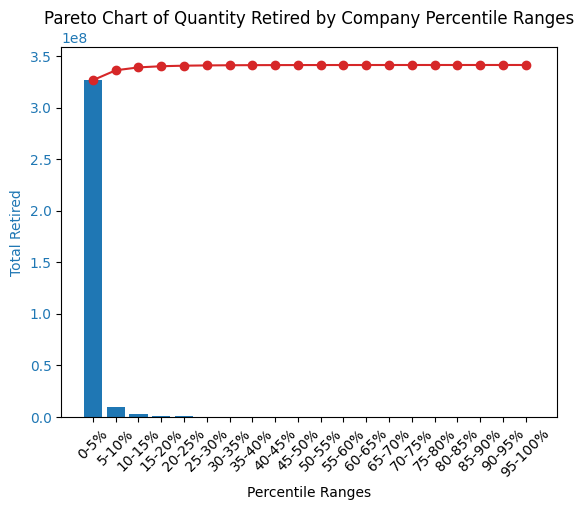

In [278]:
fig, ax = plt.subplots()

ax.bar(percentile_ranges, total_retired_by_percentile, color="tab:blue")

# Add a cumulative percentage line
cumulative_retired = [sum(total_retired_by_percentile[:i+1]) for i in range(len(total_retired_by_percentile))]
ax.plot(percentile_ranges, cumulative_retired, color="tab:red", marker="o")

ax.set_ylabel("Total Retired", color="tab:blue")
ax.tick_params(axis="y", labelcolor="tab:blue")
ax.set_xlabel("Percentile Ranges")
plt.title("Pareto Chart of Quantity Retired by Company Percentile Ranges")

plt.xticks(rotation=45)

plt.show()

**Insights**:

According to InfluenceMap, an important non-profit organization responsible for CO2 emissions research, between 2016 and 2022, only 57 companies were responsible for 80% of all CO2 emissions in the world, which corroborates with our conclusion here.

 https://carbonmajors.org/briefing/The-Carbon-Majors-Database-26913

It's also important to say that this project if focusing solely on Verra's carbon offsets. So it doesn't represent all efforts of companies to mitigate their environmental impact. Recently, there has been efforts from companies to finance internal projects not relying on any registries, or collaborations with other registries to reduce or sequester CO2 emissions in other ways.

Either way, it's nice to be able to visualize this information like this.


If you are curious to know more about retirements per company, check my PBI Dashboard!

### Retirements by Country / Region

##### Retirements

In [226]:
retirements_country = retirements_df.groupby("Country")["Quantity Retired"].sum().copy().sort_values(ascending=False).reset_index()
retirements_country["Pct"] = (retirements_country["Quantity Retired"] / retirements_country["Quantity Retired"].sum() * 100).apply(lambda x: "{:.2f}%".format(x))

retirements_region = retirements_df.groupby("Region")["Quantity Retired"].sum().copy().sort_values(ascending=False).reset_index()
retirements_region["Pct"] = (retirements_region["Quantity Retired"] / retirements_region["Quantity Retired"].sum() * 100).apply(lambda x: "{:.2f}%".format(x))


In [227]:
retirements_region

Region  Quantity Retired     Pct
0           Asia         391058958  55.72%
1  South America         146693950  20.90%
2         Africa          89146035  12.70%
3  North America          41877957   5.97%
4         Europe          31177437   4.44%
5        Oceania           1827294   0.26%

In [293]:
top_20_countries = retirements_country.sort_values(by="Quantity Retired", ascending=False)
top_20_countries = top_20_countries.head(20)

fig = go.Figure(go.Bar(
    x=top_20_countries["Quantity Retired"],
    y=top_20_countries["Country"],
    orientation="h",
    marker_color="#007760",
))


fig.update_layout(
    title="<b>Retirements - Top 20 by Project Country<b>",
    title_font_size=22,
    xaxis_title="Quantity Retired",
    yaxis_title="Country",
    yaxis=dict(
        autorange="reversed",
        tickvals=top_20_countries["Country"],
        ticktext=[country[:15] + ('...' if len(country) > 15 else '') for country in top_20_countries["Country"]]  # Set tick text with truncated country names
    ),
    width=800,
    height=600
)

# Show the figure
fig.show()

pio.write_image(fig, r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\images\project_country_top20.png", engine="kaleido")

In [331]:
custom_gradient = [
    [0.0, "#dfefde"],
    [1.0, "#154912"]
]

fig = go.Figure(data=go.Choropleth(
    locations=retirements_country["Country"],  
    z=retirements_country["Quantity Retired"],
    locationmode="country names",
    colorscale=custom_gradient, 
    colorbar_title="Quantity Retired",
))

# Add title and labels
fig.update_layout(
    title="<b>Retirement by Project Country<b>",
    title_font_size=22,
    width=1000,
    height=500,
    margin=dict(l=30, r=60, t=60, b=30),
    geo=dict(
        scope="world",
        landcolor="lightgray",
        showocean=True,
        oceancolor="lightblue", 
        showcountries=True,
        countrycolor="black",
        resolution=110,
        showlakes=True, 
        lakecolor="lightblue")
)

# Show the figure
fig.show()

pio.write_image(fig, r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\images\project_country_map.png", engine="kaleido")

In [294]:
fig = go.Figure(go.Bar(
    x=retirements_region["Quantity Retired"],
    y=retirements_region["Region"],
    orientation="h"
))

fig.update_layout(
    title="<b>Retirements - Top 20 by Project Continent<b>",
    title_font_size=22,
    xaxis_title="Quantity Retired",
    yaxis_title="Continent",
    yaxis=dict(autorange="reversed"),
    width=750,
    height=500
)

fig.update_traces(marker_color = "#007760")

# Show the figure
fig.show()

pio.write_image(fig, r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\images\retirements_continent_top20.png", engine="kaleido")

In [317]:
# Fetch the continent data
cont = requests.get(
    "https://gist.githubusercontent.com/hrbrmstr/91ea5cc9474286c72838/raw/59421ff9b268ff0929b051ddafafbeb94a4c1910/continents.json"
)

# Convert the data to a GeoDataFrame
gdf = gpd.GeoDataFrame.from_features(cont.json())

# Merge with retirements_region DataFrame on region name
gdf = gdf.merge(retirements_region, left_on="CONTINENT", right_on="Region")


fig = px.choropleth_mapbox(
    gdf,
    geojson=gdf.geometry,
    locations=gdf.index,
    color="Quantity Retired",
    mapbox_style="open-street-map",
    color_continuous_scale=custom_gradient,
    opacity=0.5,
    zoom=1,
    width=1000,
    height=500,
    title="<b>Retirement by Project Continent<b>",
    hover_name=gdf["CONTINENT"]
)


fig.update_layout(
    margin={"l": 40, "r": 200, "b": 20, "t": 60},
    title_font_size=22,
    mapbox=dict(
        center=dict(lon=0, lat=10),  # Adjust the center of the map
        zoom=0.55
    )
)


fig.show()


pio.write_image(fig, r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\images\project_continent_map.png", engine="kaleido")

##### Available

In [319]:
available_country = available_df.groupby("Country")["Quantity Available"].sum().copy().sort_values(ascending=False).reset_index()
available_country["Pct"] = (available_country["Quantity Available"] / available_country["Quantity Available"].sum() * 100).apply(lambda x: "{:.2f}%".format(x))

available_region = available_df.groupby("Region")["Quantity Available"].sum().copy().sort_values(ascending=False).reset_index()
available_region["Pct"] = (available_region["Quantity Available"] / available_region["Quantity Available"].sum() * 100).apply(lambda x: "{:.2f}%".format(x))

In [390]:
total_issuance_region = pd.merge(available_region, retirements_region, how="outer", on="Region")
total_issuance_region["Total Issued"] = available_region["Quantity Available"] + retirements_region["Quantity Retired"]
total_issuance_region["% Available"] = ((available_region["Quantity Available"] / total_issuance_region["Total Issued"]) * 100).apply(lambda x: "{:.2f}%".format(x))

total_issuance_region

Region  Quantity Available   Pct_x  Quantity Retired   Pct_y  \
0           Asia           271403036  53.17%         391058958  55.72%   
1  South America           104333411  20.44%         146693950  20.90%   
2         Africa            86565100  16.96%          89146035  12.70%   
3         Europe            32154103   6.30%          31177437   4.44%   
4  North America            14916975   2.92%          41877957   5.97%   
5        Oceania             1062735   0.21%           1827294   0.26%   

   Total Issued % Available  
0     662461994      40.97%  
1     251027361      41.56%  
2     175711135      49.27%  
3      74032060      43.43%  
4      46094412      32.36%  
5       2890029      36.77%

In [429]:
fig = go.Figure()


fig.add_trace(go.Bar(
    y=total_issuance_region["Region"][::-1],  # Reverse the order of countries
    x=total_issuance_region["Quantity Available"][::-1],  # Reverse the order of quantities
    orientation="h",
    name="Quantity Available",
    marker=dict(color="#003366")
))


fig.add_trace(go.Bar(
    y=total_issuance_region["Region"][::-1], 
    x=total_issuance_region["Quantity Retired"][::-1],  
    orientation="h",
    name="Quantity Retired",
    marker=dict(color="#0059b3")
))


fig.update_layout(
    title="<b>Availability vs Retirements by Continent<b>",
    title_font_size=22,
    xaxis_title="Quantity",
    yaxis_title="Continent",
    barmode="stack",
    width=800
)


fig.show()

pio.write_image(fig, r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\images\av_vs_ret_continent_pct.png", engine="kaleido")

In [413]:
retirements_df_europe = retirements_df[retirements_df["Region"] == "Europe"]
retirements_df_europe = retirements_df_europe.groupby("Country")["Quantity Retired"].sum().reset_index().sort_values(by="Quantity Retired", ascending=False)

available_df_europe = available_df[available_df["Region"] == "Europe"]
available_df_europe = available_df_europe.groupby("Country")["Quantity Available"].sum().reset_index().sort_values(by="Quantity Available", ascending=False)

availability_europe = pd.merge(retirements_df_europe, available_df_europe, how="outer", on="Country")
availability_europe["Total Issued"] = availability_europe["Quantity Available"] + availability_europe["Quantity Retired"]
availability_europe["% Available"] = (availability_europe["Quantity Available"] / availability_europe["Total Issued"]  * 100).apply(lambda x: "{:.2f}%".format(x))

availability_europe

Country  Quantity Retired  Quantity Available  Total Issued  \
0          Turkey          19905410            30533432      50438842   
1         Germany           8799262              279462       9078724   
2        Bulgaria           1676143              459033       2135176   
3     Netherlands            629764              557883       1187647   
4         Georgia            139783              281217        421000   
5  United Kingdom             12549               35807         48356   
6          Cyprus              8781                6390         15171   
7         Romania              5745                 879          6624   

  % Available  
0      60.54%  
1       3.08%  
2      21.50%  
3      46.97%  
4      66.80%  
5      74.05%  
6      42.12%  
7      13.27%

In [430]:
fig = go.Figure()

# Add bars for Quantity Available
fig.add_trace(go.Bar(
    y=availability_europe["Country"][::-1],  # Reverse the order of countries
    x=availability_europe["Quantity Available"][::-1],  # Reverse the order of quantities
    orientation="h",
    name="Quantity Available",
    marker=dict(color="#003366")
))

# Add bars for Quantity Retired
fig.add_trace(go.Bar(
    y=availability_europe["Country"][::-1],
    x=availability_europe["Quantity Retired"][::-1], 
    orientation="h",
    name="Quantity Retired",
    marker=dict(color="#0059b3")
))

# Update layout
fig.update_layout(
    title="<b>Availability vs Retirements by Country<b>",
    title_font_size=22,
    xaxis_title="Quantity",
    yaxis_title="Continent",
    barmode="stack",
    width=800
)

# Show the plot
fig.show()

pio.write_image(fig, r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\images\av_vs_ret_country_pct.png", engine="kaleido")

In [343]:
top_20_countries_av = available_country.sort_values(by="Quantity Available", ascending=False)
top_20_countries_av = top_20_countries_av.head(20)


fig = go.Figure(go.Bar(
    x=top_20_countries_av["Quantity Available"],
    y=top_20_countries_av["Country"],
    orientation="h",
    marker_color="#003366", 
))


fig.update_layout(
    title="<b>Availability - Top 20 by Project Country<b>",
    title_font_size=22,
    xaxis_title="Quantity Available",
    yaxis_title="Country",
    yaxis=dict(
        autorange="reversed", 
        tickvals=top_20_countries["Country"],  
        ticktext=[country[:15] + ('...' if len(country) > 15 else '') for country in top_20_countries["Country"]]
    ), 
    width=800,
    height=600
)


fig.show()

pio.write_image(fig, r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\images\av_country_top20.png", engine="kaleido")

In [342]:
custom_gradient_av = [
    [0.0, "#bddeff"],
    [1.0, "#003366"]
]

fig = go.Figure(data=go.Choropleth(
    locations=available_country["Country"], 
    z=available_country["Quantity Available"], 
    locationmode="country names", 
    colorscale=custom_gradient_av,
    colorbar_title="Quantity Available", 
))

# Add title and labels
fig.update_layout(
    title="<b>Availability by Project Country<b>",
    title_font_size=22,
    width=1000, 
    height=500,
    margin=dict(l=30, r=60, t=60, b=30),
    geo=dict(
        scope="world",
        landcolor="lightgray",  
        showocean=True, 
        oceancolor="lightgrey",  
        showcountries=True,  
        countrycolor="black",  
        resolution=110,  
        lataxis=dict(range=[-60, 90]),  
        lonaxis=dict(range=[-180, 180]),
        showlakes=True,  
        lakecolor="lightblue"  
    )
)


fig.show()

pio.write_image(fig, r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\images\av_project_country_map.png", engine="kaleido")

In [344]:
fig = go.Figure(go.Bar(
    x=available_region["Quantity Available"],
    y=available_region["Region"],
    orientation="h"
))


fig.update_layout(
    title="<b>Availability - Top 20 by Project Continent<b>",
    title_font_size=22,
    xaxis_title="Quantity Available",
    yaxis_title="Continent",
    yaxis=dict(autorange="reversed"), 
    width=750,
    height=500
)

fig.update_traces(marker_color = "#003366")


fig.show()

pio.write_image(fig, r"C:\Users\Victor\Documents\GitHub\EDA_carbon_credits\EDA_carbon_credits\images\av_continent_top20.png", engine="kaleido")

In [362]:
gdf = gdf.merge(available_region, left_on="CONTINENT", right_on="Region")

custom_gradient_av2 = [
    [0.0, "#a0caf5"],
    [1.0, "#033a71"]
]


fig = px.choropleth_mapbox(
    gdf,
    geojson=gdf.geometry,
    locations=gdf.index,
    color="Quantity Available",
    mapbox_style="carto-positron",
    color_continuous_scale=custom_gradient_av2,
    opacity=0.5,
    zoom=1,
    width=1000,
    height=500,
    title="<b>Availability by Project Continent<b>",
    hover_name=gdf["CONTINENT"]
)


fig.update_layout(margin={"l": 40, "r": 200, "b": 20, "t": 60}, title_font_size=22)


fig.show()

c:\Users\Victor\anaconda3\lib\site-packages\geopandas\geodataframe.py:1556: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Region_x', 'Pct_x'} in the result is deprecated and will raise a MergeError in a future version.



**Insights**:

- By the % of available credits, we conclude that North America and Oceania credits are more contested than other parts of the world. 
  I'd also include Europe in this group. Its availability rate is not as low as that of these other two regions because Turkey has a socio-geographical situation that is more similar to that of Asian countries.

- Countries in the tropics are by far the largest project developers.

    This may indicate investment opportunities in countries with similar biodiversity and weather, but that has yet to be very active in carbon credits.

- To search more dynamically by retirements and availability per country and continent, check my PBI dashboard!

#### Additional Certifications / SDGs

Additional Certifications and the [Sustainable Development Goals](https://sdgs.un.org/goals) (SDGs) are tools that allow us to search for projects considered as higher quality.

Additional Certifications, such as [CCB](https://verra.org/programs/ccbs/), involves validations from organizations that a given project is delivering co-benefits to surrounding communities and biodiversity.

The SDGs are a set of 17 goals created by UN aimed at addressing global issues like poverty, inequality, and climate change. 

##### Additional Certifications

In [363]:
retirements_add_cert = retirements_df.groupby("Additional Certifications")["Quantity Retired"].sum().copy().sort_values(ascending=False).reset_index()

retirements_add_cert

Additional Certifications  Quantity Retired
0                                            CCB-Gold          90529731
1   CCB-Biodiversity Gold; CCB-Climate Gold; CCB-C...          26210774
2                                       Social Carbon          19389511
3   CCB-Biodiversity Gold; CCB-Climate Gold; CCB-C...          14590672
4                                  CCB-No Distinction          10722522
5                               CCB-Biodiversity Gold          10329116
6   CCB-Biodiversity Gold; CCB-Climate Gold; CCB-Gold           9768204
7                     CCB-Biodiversity Gold; CCB-Gold           9382061
8             CCB-Biodiversity Gold; CCB-Climate Gold           8551842
9   01: No Poverty; 02: Zero Hunger; 03: Good Heal...           6357203
10  01: No Poverty; 02: Zero Hunger; 03: Good Heal...           5075808
11                                         CCB-Silver           2997435
12                    CORSIA – Pilot Phase, 2021-2023           2626296
13                                   CCB-Climate Gold           2486669
14                                 CCB-Community Gold           1753637
15  CCB-Biodiversity Gold; CORSIA – Pilot Phase, 2...            908204
16  01: No Poverty; 02: Zero Hunger; 03: Good Heal...            879910
17  01: No Poverty; 02: Zero Hunger; 03: Good Heal...            856304
18  06: Clean Water and Sanitation; 13: Climate Ac...            557527
19                       CCB-Community Gold; CCB-Gold            469790
20  06: Clean Water and Sanitation; 12: Responsibl...            383471
21          CCB-Biodiversity Gold; CCB-Community Gold            340350
22               CCB-Climate Gold; CCB-Community Gold            302307
23  CCB-No Distinction; CORSIA – Pilot Phase, 2021...            172867
24  01: No Poverty; 02: Zero Hunger; 03: Good Heal...             80536
25  03: Good Health and Well-being; 04: Quality Ed...             57344
26  Article 6 Authorized – Intl mitigation purpose...             21938
27  06: Clean Water and Sanitation; 12: Responsibl...             12211
28  03: Good Health and Well-being; 07: Affordable...               115
29  08: Decent Work and Economic Growth; 12: Respo...                80

There are SDGs values in the Additional Certifications column.

To fix it, we are creating a list of all SDG values and locate all values within Additional Certification column including any of those SDGs. If there are, the value will be moved to the SDGs column.

In [364]:
sdgs_values = [
    "01: No Poverty",
    "02: Zero Hunger",
    "03: Good Health and Well-being",
    "04: Quality Education",
    "05: Gender Equality",
    "06: Clean Water and Sanitation",
    "07: Affordable and Clean Energy",
    "08: Decent Work and Economic Growth",
    "09: Industry, Innovation and Infrastructure",
    "10: Reduced Inequalities",
    "11: Sustainable Cities and Communities",
    "12: Responsible Consumption and Production",
    "13: Climate Action",
    "14: Life Below Water",
    "15: Life on Land",
    "16: Peace, Justice, and Strong Institutions",
    "17: Partnerships for the Goals"
]

In [365]:
# Function to extract SDGs from "Additional Certifications" column
def extract_sdgs(row):
    additional_cert = row["Additional Certifications"]
    sdgs = row["SDGs"]
    # Check if additional_cert is a string and not NaN (which is a float)
    if isinstance(additional_cert, str) and not pd.isnull(additional_cert):
        # Check if any part of additional_cert matches any SDG value
        sdg_present = any(sdg in additional_cert for sdg in sdgs_values)
        if sdg_present:
            # Move the entire value to "Sustainable Development Goals" column
            row["SDGs"] = additional_cert
            # Remove the value from "Additional Certifications" column
            row["Additional Certifications"] = ""
    return row

# Apply the function to each row
retirements_df = retirements_df.apply(extract_sdgs, axis=1)

In [366]:
retirements_add_cert = retirements_df.groupby("Additional Certifications")["Quantity Retired"].sum().copy().sort_values(ascending=False).reset_index()
retirements_df["Additional Certifications"] = retirements_df["Additional Certifications"].replace("", np.nan)

retirements_add_cert

Additional Certifications  Quantity Retired
0                                            CCB-Gold          90529731
1   CCB-Biodiversity Gold; CCB-Climate Gold; CCB-C...          26210774
2                                       Social Carbon          19389511
3   CCB-Biodiversity Gold; CCB-Climate Gold; CCB-C...          14590672
4                                                              14260509
5                                  CCB-No Distinction          10722522
6                               CCB-Biodiversity Gold          10329116
7   CCB-Biodiversity Gold; CCB-Climate Gold; CCB-Gold           9768204
8                     CCB-Biodiversity Gold; CCB-Gold           9382061
9             CCB-Biodiversity Gold; CCB-Climate Gold           8551842
10                                         CCB-Silver           2997435
11                    CORSIA – Pilot Phase, 2021-2023           2626296
12                                   CCB-Climate Gold           2486669
13                                 CCB-Community Gold           1753637
14  CCB-Biodiversity Gold; CORSIA – Pilot Phase, 2...            908204
15                       CCB-Community Gold; CCB-Gold            469790
16          CCB-Biodiversity Gold; CCB-Community Gold            340350
17               CCB-Climate Gold; CCB-Community Gold            302307
18  CCB-No Distinction; CORSIA – Pilot Phase, 2021...            172867
19  Article 6 Authorized – Intl mitigation purpose...             21938

In [367]:
available_add_cert = available_df.groupby("Additional Certifications")["Quantity Available"].sum().copy().sort_values(ascending=False).reset_index()

available_add_cert

Additional Certifications  Quantity Available
0                                            CCB-Gold            34879322
1             CCB-Biodiversity Gold; CCB-Climate Gold            27437924
2                               CCB-Biodiversity Gold            25547445
3   CCB-Biodiversity Gold; CCB-Climate Gold; CCB-C...            16112321
4                                  CCB-No Distinction            15550153
5                                    CCB-Climate Gold            12690664
6   01: No Poverty; 02: Zero Hunger; 03: Good Heal...            10982527
7                                       Social Carbon             9021013
8                     CORSIA – Pilot Phase, 2021-2023             8796275
9   CCB-Biodiversity Gold; CCB-Climate Gold; CCB-Gold             7564975
10  CCB-Biodiversity Gold; CCB-Climate Gold; CCB-C...             6392107
11                    CCB-Biodiversity Gold; CCB-Gold             3507798
12  01: No Poverty; 02: Zero Hunger; 03: Good Heal...             2446445
13  Article 6 Authorized – Intl mitigation purpose...             1972492
14  01: No Poverty; 02: Zero Hunger; 03: Good Heal...             1815130
15                                 CCB-Community Gold             1784804
16  CCB-No Distinction; CORSIA – Pilot Phase, 2021...             1729930
17  CCB-Biodiversity Gold; CORSIA – Pilot Phase, 2...             1684968
18                                         CCB-Silver              881109
19  06: Clean Water and Sanitation; 12: Responsibl...              627304
20  03: Good Health and Well-being; 04: Quality Ed...              501952
21  01: No Poverty; 02: Zero Hunger; 03: Good Heal...              464177
22  06: Clean Water and Sanitation; 13: Climate Ac...              452463
23                       CCB-Community Gold; CCB-Gold              397536
24  06: Clean Water and Sanitation; 12: Responsibl...              371527
25               CCB-Climate Gold; CCB-Community Gold              297438
26  08: Decent Work and Economic Growth; 12: Respo...              162343
27          CCB-Biodiversity Gold; CCB-Community Gold              123088
28  01: No Poverty; 02: Zero Hunger; 03: Good Heal...               71830
29        Carbon Dioxide Removals; CCB-No Distinction               47976
30                           GHG Emissions Reductions               17790
31  01: No Poverty; 03: Good Health and Well-being...                 975
32  03: Good Health and Well-being; 07: Affordable...                  13

In [ ]:
available_df = available_df.apply(extract_sdgs, axis=1)

In [368]:
available_df["Additional Certifications"] = available_df["Additional Certifications"].replace("", np.nan)
available_add_cert = available_df.groupby("Additional Certifications")["Quantity Available"].sum().copy().sort_values(ascending=False).reset_index()

available_add_cert

Additional Certifications  Quantity Available
0                                            CCB-Gold            34879322
1             CCB-Biodiversity Gold; CCB-Climate Gold            27437924
2                               CCB-Biodiversity Gold            25547445
3   CCB-Biodiversity Gold; CCB-Climate Gold; CCB-C...            16112321
4                                  CCB-No Distinction            15550153
5                                    CCB-Climate Gold            12690664
6   01: No Poverty; 02: Zero Hunger; 03: Good Heal...            10982527
7                                       Social Carbon             9021013
8                     CORSIA – Pilot Phase, 2021-2023             8796275
9   CCB-Biodiversity Gold; CCB-Climate Gold; CCB-Gold             7564975
10  CCB-Biodiversity Gold; CCB-Climate Gold; CCB-C...             6392107
11                    CCB-Biodiversity Gold; CCB-Gold             3507798
12  01: No Poverty; 02: Zero Hunger; 03: Good Heal...             2446445
13  Article 6 Authorized – Intl mitigation purpose...             1972492
14  01: No Poverty; 02: Zero Hunger; 03: Good Heal...             1815130
15                                 CCB-Community Gold             1784804
16  CCB-No Distinction; CORSIA – Pilot Phase, 2021...             1729930
17  CCB-Biodiversity Gold; CORSIA – Pilot Phase, 2...             1684968
18                                         CCB-Silver              881109
19  06: Clean Water and Sanitation; 12: Responsibl...              627304
20  03: Good Health and Well-being; 04: Quality Ed...              501952
21  01: No Poverty; 02: Zero Hunger; 03: Good Heal...              464177
22  06: Clean Water and Sanitation; 13: Climate Ac...              452463
23                       CCB-Community Gold; CCB-Gold              397536
24  06: Clean Water and Sanitation; 12: Responsibl...              371527
25               CCB-Climate Gold; CCB-Community Gold              297438
26  08: Decent Work and Economic Growth; 12: Respo...              162343
27          CCB-Biodiversity Gold; CCB-Community Gold              123088
28  01: No Poverty; 02: Zero Hunger; 03: Good Heal...               71830
29        Carbon Dioxide Removals; CCB-No Distinction               47976
30                           GHG Emissions Reductions               17790
31  01: No Poverty; 03: Good Health and Well-being...                 975
32  03: Good Health and Well-being; 07: Affordable...                  13

In [369]:
add_cert_total_ret = retirements_df[pd.notna(retirements_df["Additional Certifications"])]
add_cert_total_ret = add_cert_total_ret.groupby("ID")["Quantity Retired"].sum().reset_index()

add_cert_total_av = available_df[pd.notna(available_df["Additional Certifications"])]
add_cert_total_av = add_cert_total_av.groupby("ID")["Quantity Available"].sum().reset_index()

add_cert_total = add_cert_total_ret.merge(add_cert_total_av, how="outer", on="ID")
add_cert_total = add_cert_total.fillna(0)
add_cert_total["Total Issued"] = add_cert_total["Quantity Retired"] + add_cert_total["Quantity Available"]
add_cert_total["Pct Retired"] = add_cert_total["Quantity Retired"] / add_cert_total["Total Issued"]

add_cert_total.sort_values(by="Total Issued", inplace = True, ascending=False)

add_cert_total

ID  Quantity Retired  Quantity Available  Total Issued  Pct Retired
76    985        15659662.0          20952380.0    36612042.0     0.427719
119  1477        24092859.0           8604669.0    32697528.0     0.736840
67    934         6770067.0          24575903.0    31345970.0     0.215979
132  1748         5147816.0          21542581.0    26690397.0     0.192871
65    902        17489732.0           5034027.0    22523759.0     0.776501
..    ...               ...                 ...           ...          ...
100  1317            1358.0                 0.0        1358.0     1.000000
103  1332            1207.0                 0.0        1207.0     1.000000
222  2077               0.0               975.0         975.0     0.000000
224  2340               0.0                15.0          15.0     0.000000
226  2348               0.0                13.0          13.0     0.000000

[245 rows x 5 columns]

In [373]:
add_cert_total_issuance = add_cert_total["Total Issued"].sum()

add_cert_total_issuance

405887740.0

In [374]:
pct_retired_add_cert = add_cert_total["Quantity Retired"].sum() / add_cert_total["Total Issued"].sum()

pct_retired_add_cert

0.52121289990183

In [376]:
no_cert_total_ret = retirements_df[pd.isna(retirements_df["Additional Certifications"])]
no_cert_total_ret = no_cert_total_ret.groupby("ID")["Quantity Retired"].sum().reset_index()

no_cert_total_av = available_df[pd.isna(available_df["Additional Certifications"])]
no_cert_total_av = no_cert_total_av.groupby("ID")["Quantity Available"].sum().reset_index()

no_cert_total = no_cert_total_ret.merge(no_cert_total_av, how="outer", on="ID")
no_cert_total = no_cert_total.fillna(0)
no_cert_total["Total Issued"] = no_cert_total["Quantity Retired"] + no_cert_total["Quantity Available"]
no_cert_total["Pct Retired"] = no_cert_total["Quantity Retired"] / no_cert_total["Total Issued"]

no_cert_total.sort_values(by="Total Issued", inplace = True, ascending=False)

no_cert_total

ID  Quantity Retired  Quantity Available  Total Issued  Pct Retired
1133  1742        10603536.0          12547981.0    23151517.0     0.458006
527    674        19363226.0           1744427.0    21107653.0     0.917356
1069  1566        17085391.0             32273.0    17117664.0     0.998115
665    868         7408131.0           9062711.0    16470842.0     0.449772
71      92         8927861.0           7109792.0    16037653.0     0.556681
...    ...               ...                 ...           ...          ...
1332  2348             115.0                 0.0         115.0     1.000000
1436  2864              80.0                 0.0          80.0     1.000000
1684  3657               0.0                65.0          65.0     0.000000
1549  1909               0.0                44.0          44.0     0.000000
1447  2992               1.0                 0.0           1.0     1.000000

[1709 rows x 5 columns]

In [377]:
pct_retired_no_cert = no_cert_total["Quantity Retired"].sum() / no_cert_total["Total Issued"].sum()

pct_retired_no_cert

0.6079746014323868

The goal here was to understand whether there is any relevant change in the demand for credits with Additional Certifications.

Undoubtedly, the demand for a particular credit is influenced by numerous factors, with price being one of the key considerations.

All else equal, the price of a credit with no additional certifications will be lower than one with additional certifications.

Naturally, price is one of the biggest decision drivers when companies want to use carbon credits to offset their emissions. However, it is interesting to notice that, proportionally, we have more credits with additional certifications available than those without.

That may indicate companies are not worried about the co-benefits those certifications bring.

##### SDGs

In [378]:
retirements_sdgs = retirements_df.groupby("SDGs")["Quantity Retired"].sum().copy().sort_values(ascending=False).reset_index()
retirements_sdgs["SDGs"] = retirements_sdgs["SDGs"].apply(lambda x: "; ".join(re.findall(r"(\d+):", x)))
retirements_sdgs["SDGs Count"] = retirements_sdgs["SDGs"].astype(str).apply(lambda x: len(x.split("; ")))

retirements_sdgs.head(10)

SDGs  Quantity Retired  \
0  01; 02; 03; 04; 05; 06; 07; 08; 09; 10; 11; 12...          13157791   
1  01; 02; 03; 04; 05; 06; 08; 10; 12; 13; 15; 16...          11542895   
2  01; 02; 03; 04; 05; 06; 07; 08; 09; 10; 11; 12...           6357203   
3  01; 02; 03; 04; 05; 06; 08; 09; 10; 11; 12; 13...           5147816   
4  01; 02; 03; 04; 05; 06; 07; 08; 09; 10; 11; 12...           5075808   
5                                         06; 13; 15           2783926   
6                     01; 03; 04; 05; 07; 08; 13; 15           1234971   
7                         04; 06; 08; 12; 13; 15; 17           1045120   
8  01; 02; 03; 04; 05; 06; 07; 08; 09; 10; 11; 12...            879910   
9                                         07; 08; 13            863302   

   SDGs Count  
0          17  
1          13  
2          17  
3          15  
4          17  
5           3  
6           8  
7           7  
8          17  
9           3

Since there are 17 SDGs, we shouldn't have multiple grouped values with 17 SDGs.
Let's convert all values to str, remove blank spaces and try again.

In [379]:
retirements_sdgs["SDGs"] = retirements_sdgs["SDGs"].astype(str).str.replace(" ", "")
retirements_sdgs = retirements_sdgs.groupby("SDGs")["Quantity Retired"].sum().reset_index()
retirements_sdgs["SDGs Count"] = retirements_sdgs["SDGs"].astype(str).apply(lambda x: len(x.split(";")))

retirements_sdgs.head(10)


SDGs  Quantity Retired  \
0  01;02;03;04;05;06;07;08;09;10;11;12;13;14;15;1...          25470712   
1       01;02;03;04;05;06;08;09;10;11;12;13;15;16;17           6084656   
2             01;02;03;04;05;06;08;10;12;13;15;16;17          11542895   
3                         01;02;03;04;05;07;08;13;15              5178   
4                                     01;02;04;08;13             27699   
5                            01;03;04;05;07;08;13;15           1234971   
6                               01;03;05;06;08;13;15             30960   
7                               01;03;05;07;08;13;15             65702   
8                                     01;08;12;13;15            205300   
9                         02;03;04;05;07;08;09;13;15            483395   

   SDGs Count  
0          17  
1          15  
2          13  
3           9  
4           5  
5           8  
6           7  
7           7  
8           5  
9           9

In [380]:
retirements_sdgs_pct = retirements_sdgs["Quantity Retired"].sum() / retirements_df["Quantity Retired"].sum()

retirements_sdgs_pct

0.0728414007177113

In [381]:
no_sdgs_total_ret = retirements_df[pd.isna(retirements_df["SDGs"])]
no_sdgs_total_ret = no_sdgs_total_ret.groupby("ID")["Quantity Retired"].sum().reset_index()

no_sdgs_total_av = available_df[pd.isna(available_df["SDGs"])]
no_sdgs_total_av = no_sdgs_total_av.groupby("ID")["Quantity Available"].sum().reset_index()

no_sdgs_total = no_sdgs_total_ret.merge(no_cert_total_av, how="outer", on="ID")
no_sdgs_total = no_sdgs_total.fillna(0)
no_sdgs_total["Total Issued"] = no_sdgs_total["Quantity Retired"] + no_sdgs_total["Quantity Available"]
no_sdgs_total["Pct Retired"] = no_sdgs_total["Quantity Retired"] / no_sdgs_total["Total Issued"]

no_sdgs_total.sort_values(by="Total Issued", inplace = True, ascending=False)

no_sdgs_total

ID  Quantity Retired  Quantity Available  Total Issued  Pct Retired
1084  1477        24558752.0           5418356.0    29977108.0     0.819250
1212  1742        10603536.0          12547981.0    23151517.0     0.458006
732    902        21783967.0              4959.0    21788926.0     0.999772
1144  1566        19352244.0             32273.0    19384517.0     0.998335
702    868         7408131.0           9062711.0    16470842.0     0.449772
...    ...               ...                 ...           ...          ...
1607   607               0.0               100.0         100.0     0.000000
1817  3657               0.0                65.0          65.0     0.000000
1665  1909               0.0                44.0          44.0     0.000000
1601   562               0.0                 3.0           3.0     0.000000
1561  2992               1.0                 0.0           1.0     1.000000

[1842 rows x 5 columns]

In [382]:
sdgs_total_ret = retirements_df[pd.notna(retirements_df["SDGs"])]
sdgs_total_ret = sdgs_total_ret.groupby("ID")["Quantity Retired"].sum().reset_index()

sdgs_total_av = available_df[pd.notna(available_df["SDGs"])]
sdgs_total_av = sdgs_total_av.groupby("ID")["Quantity Available"].sum().reset_index()

sdgs_total = sdgs_total_ret.merge(sdgs_total_av, how="outer", on="ID")
sdgs_total = sdgs_total.fillna(0)
sdgs_total["Total Issued"] = sdgs_total["Quantity Retired"] + sdgs_total["Quantity Available"]
sdgs_total["Pct Retired"] = sdgs_total["Quantity Retired"] / sdgs_total["Total Issued"]

sdgs_total.sort_values(by="Total Issued", inplace = True, ascending=False)

sdgs_total

ID  Quantity Retired  Quantity Available  Total Issued  Pct Retired
3    674        25470712.0           8154904.0    33625616.0     0.757479
6   1748         6084656.0          21542581.0    27627237.0     0.220241
2    612         8050335.0           9195654.0    17245989.0     0.466795
16  2372          405126.0           4039516.0     4444642.0     0.091149
0    562         3492560.0            315639.0     3808199.0     0.917116
..   ...               ...                 ...           ...          ...
7   1857           12500.0                 0.0       12500.0     1.000000
38  2390               0.0             11058.0       11058.0     0.000000
44  2676               0.0              1193.0        1193.0     0.000000
35  2077               0.0               975.0         975.0     0.000000
12  2348             115.0                13.0         128.0     0.898438

[65 rows x 5 columns]

In [383]:
sdgs_total_av.sort_values(by="Quantity Available", inplace = True, ascending=False)

sdgs_total_av

ID  Quantity Available
6   1748            21542581
2    612             9195654
3    674             8154904
18  2372             4039516
11  2342             2724952
..   ...                 ...
22  2473               22670
20  2390               11058
36  2676                1193
8   2077                 975
12  2348                  13

[64 rows x 2 columns]

In [ ]:
sdgs_total["Quantity Retired"].sum()

51118757.0

In [ ]:
sdgs_issuance_pct = sdgs_total["Total Issued"].sum() / (sdgs_total["Total Issued"].sum() + no_sdgs_total["Total Issued"].sum())

sdgs_issuance_pct

0.1054213233932689

In [384]:
sdgs_retirement_pct = sdgs_total["Quantity Retired"].sum() / sdgs_total["Total Issued"].sum()

sdgs_retirement_pct

0.4405382066868518

Here, the goal is understanding if SDGs are crucial for increasing carbon credit demand or not, but we have two main problems here:

Theoretically, all projects should have at least 1 SDG (Climate Action), but this is not the case if we look at the data.

The other problem is that SDGs are input by the project's developer, which may or may not reflect reality. If a project developer assigns 17 SDGs to a project, it's hard to believe they would be faking such crucial information, but still, you would have to look at the entire documentation to check if that makes sense.

Since 2023, Verra has implemented the SD Vista initiative, which validates which SDGs can be assigned to a project. However, only a few projects went through this process.

Independent of this, SDGs improve a project's quality, but as with many other pieces of evidence in this report, they don't impact the demand much since retirers look mainly for low costs.

## Conclusion

- **Key Findings**

    <br>

    - **What characteristics determine the quality of a carbon credit?**

        Attributes such as additional certifications and SDGs are crucial for defining the quality of the project. They show which type of sustainable practices the project is contributing to.

        The methodology can also determine a project's quality once it provides more technical aspects and considers the baseline emissions of the area used by the project. If, when compared against the baseline, the project has a significant impact on the environment, that's a good project.

        Some of the most important characteristics weren't shown here because they are outside Verra's registry database but inside the project description document: Additionality and Permanence.
                
            
        Additionality represents the importance of developing a project in that area or process to reduce or sequester CO2 emissions. In other words, would that area suffer significant environmental damage without the project? When discussing renewables, how much pollution would be caused by using old energy sources?

        Permanence represents how long those reductions will last. All projects have a lifetime, usually a couple of decades. Now imagine if a project is active for 20 years, and after those 20 years, the land owner is allowed to deforest the entire forest. That will impact how that project is seen.

        Besides the factors mentioned above, it's also worth noting that there are organizations doing a fantastic job developing great projects. Naturally, every project from those organizations will be considered a good project.

        One thing that doesn't impact the quality of the project but increases its demand is its location. We saw how the Asian, South American, and African credit supply is larger than that from the rest of the world. Given their rarity, companies highly demand projects from Europe and North America.

        Talking specifically about credits within the same project, Vintage is what sets them apart.

        <br>


    - **Is there a pattern among companies offsetting through carbon credits?**

        Throughout this report, there were many insights bringing evidence of how companies are, on average, more concerned with price than the quality of the project. While it's   safe to say there are a lot of companies looking for the best projects, by noticing that availability and retirement patterns are almost the same according to multiple criteria, we can't see a huge difference.

        The price adjustment naturally caused by the market plays a huge part in making those low-quality projects look interesting.

        Still, there are important conclusions we can reach here.

        Credit age is one of the main indicators that a company should buy that credit. Credits older than eight years will make that offset look bad and may backfire.

        To facilitate understanding, let's say that if a random company is looking to offset CO2 emissions right now, it would probably look at credits from AFOLU and Renewable projects, with Vintages 2018-2021, from Asian, African, or South American countries.

        If they want to go a little further and search for high-quality projects, they would also consider Additional Certifications and SDGs

        <br>


    - **What is the current state of the carbon credit market?**

        When talking about Verra, this project focus, the issuance vs retirements difference drop in these last years may indicate that they are worried about registering multiple low contested projects and end up with a huge pool of available. That could cause a price drop of credits registered there.

        A similar situation happened with CDM, one of the first registries for carbon credits projects. After they went through this type of inbalance between issuance, retirements and project quality, CDM is vastly seen on the market as a registry for low quality projects.

        Now, for a more broad analysis on the carbon credits market, the perspective is positive overall. There are more and more investment coming towards not only project development but also technology research.

        There are other registries competing with Verra in the Voluntary Carbon Market (VCM), some other registries focusing on high quality projects, such as Plan Vivo and their biochar projects.

        Besides all this, it's essential to keep an eye on regulations accross the globe, creating a regulated environment on which companies can exchange credits between each other with a series of rules.

        There are still companies based in countries with active regulations regarding CO2 emissions that are active on the VCM, but as more countries adhere to these regulations and those countries with active regulations, keep evolving their regulation system, the impact on the VCM can be relevant.


        <br>
                


- **Limitations of the Analysis**:

    As mentioned before, price is an essential driver of demand for companies. It is important to remember that even though we did find some valuable insights with these reports, for players in this market looking to speculate, there is always a suitable price for every credit.

    Prices can vary drastically depending on many factors. Carbon credits traded via cap-and-trade systems within regulated countries, for example, are far more expensive than those traded in the Voluntary Carbon Market, which we are analyzing here.

    The Internet provides some information about prices, but they generally use an average price to address all projects of a given type. Since this project's goal was to give an overview of the carbon credit's market characteristics, we won't analyze them at the moment.

    It is still worth giving an idea of the average prices of the most common projects:

    REDD+: $1 to $15 
    ARR: $5 to 25  
    Renewable Energies: $0.50 up to $5

    Vintage, Additional Certifications, SDGs, and the Project's Country are commonly perceived as the most important factors determining a project's quality. A project's availability at a given moment can also affect its price.
